In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def line(x, m, b):
    return m*x + b

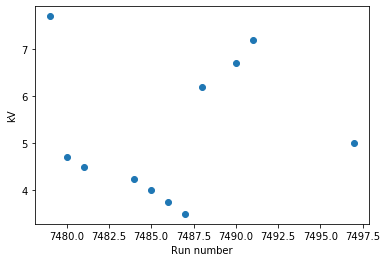

In [3]:
kV_v_run = {7479 : 7.7,
            7480 : 4.7,
            7481 : 4.5,
            7484 : 4.25,
            7485 : 4.0,
            7486 : 3.75,
            7487 : 3.5,
            7488 : 6.2,
            7490 : 6.7,
            7491 : 7.2,
            7497 : 5}

plt.plot(list(kV_v_run.keys()), list(kV_v_run.values()), 'o')
plt.ylabel('kV')
plt.xlabel('Run number')
plt.show()

In [4]:
runs = np.array(list(kV_v_run.keys()))
ELVs = np.array(list(kV_v_run.values()))

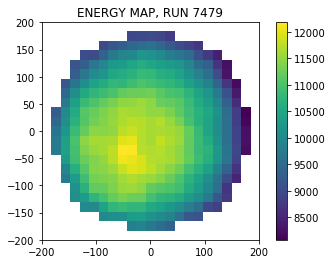

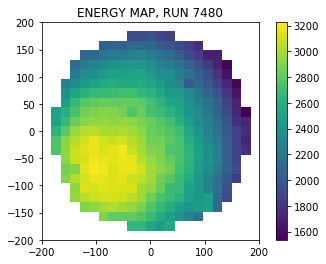

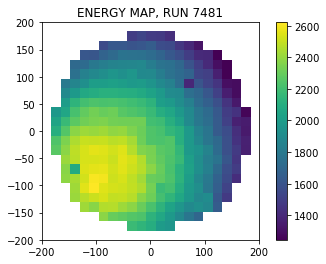

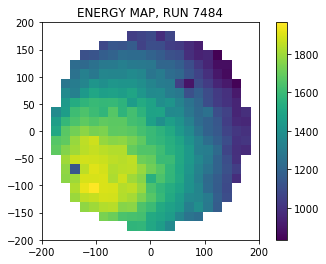

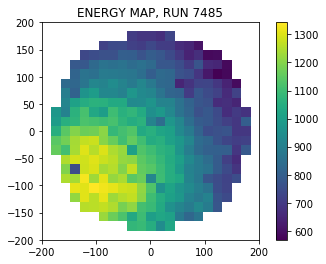

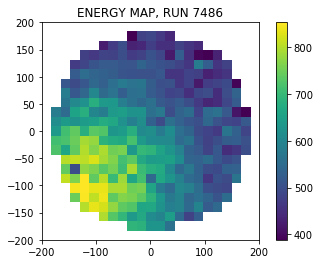

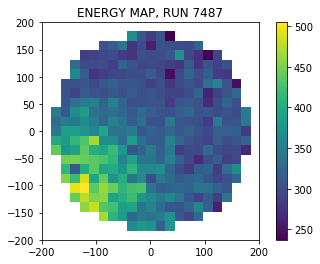

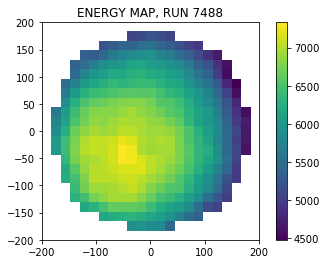

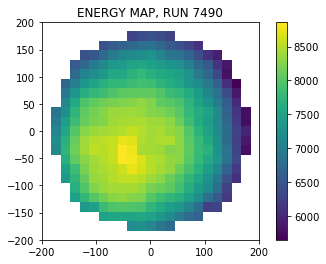

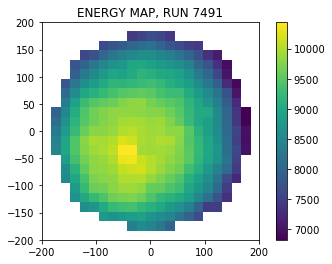

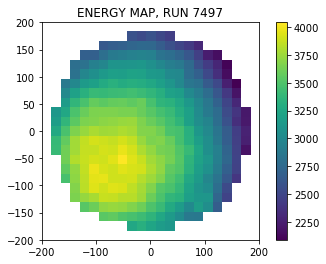

In [5]:
energy_v_bin_by_run = []

for run in runs:
    mapfile = './maps_from_maxsipm/map_'+str(run)+'.npy'
    with open(mapfile, 'rb') as f:
        run_map_xy = np.load(f)
        energy_v_bin_by_run.append(run_map_xy)
        plt.imshow(run_map_xy, extent=[-200, 200, -200, 200], origin = 'lower')
        plt.title('ENERGY MAP, RUN '+str(run))
        plt.colorbar()
        plt.show()
        
energy_v_bin_by_run = np.array(energy_v_bin_by_run)

[11637.05038209  2829.1368341   2243.13283278  1598.3806192
  1056.23346262   617.38363003   318.75724466  6916.47423469
  8408.91062811  9901.51653852  3669.47174549]


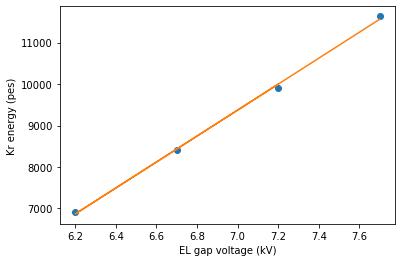

In [6]:
testx, testy = 11, 11
test_energies = np.array([ run_e[testx][testy] for run_e in energy_v_bin_by_run ])
popt, pcov = curve_fit(line, ELVs[ELVs > 6], test_energies[ELVs > 6])
fitline = line( ELVs[ELVs > 6], *popt)

print(test_energies)
plt.plot(ELVs[ELVs > 6], test_energies[ELVs > 6], 'o')
plt.plot(ELVs[ELVs > 6], fitline)
plt.xlabel('EL gap voltage (kV)')
plt.ylabel('Kr energy (pes)')
plt.show()

In [7]:
# From https://next.ific.uv.es/DocDB/0010/001094/001/EL%20Gap%20Performance%20in%20NEW_CM_July_2020.pdf, 
# Light yield L = A*(V - Bpd). So the X intercept is -ABpd, ie proportional to -d.
# The factors are as follows: L = light yield, in pes. A is the product of the absolute 
# electroluminescence yield (Coimbra) and NEW effective detection efficiency.

In [8]:
# We have L = A(V - Bpd). So, looking at L vs V, we have that for the L = 0 intercept V0, 0 = V0 - Bpd,
# so d = V0 / Bp. Remember that for the line y = mx + b, the x intercept is 0 = m x0 + b => x0 = -b / m
# Then, 

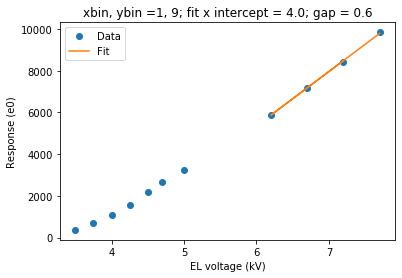

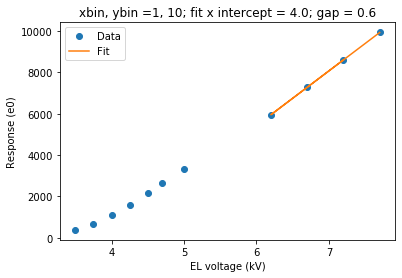

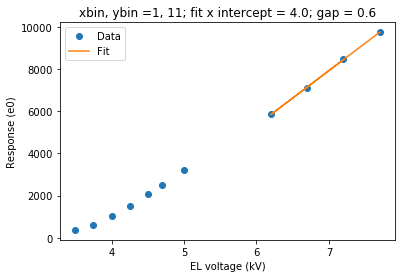

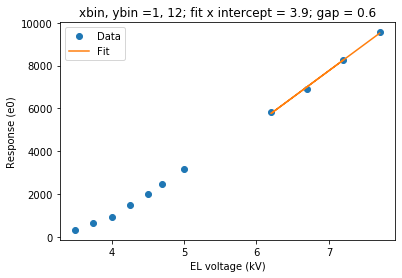

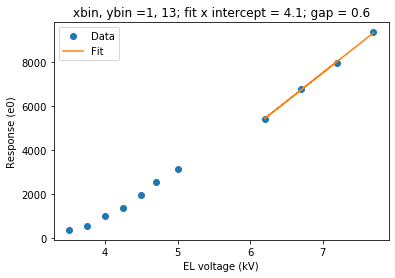

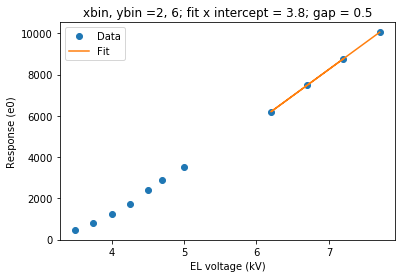

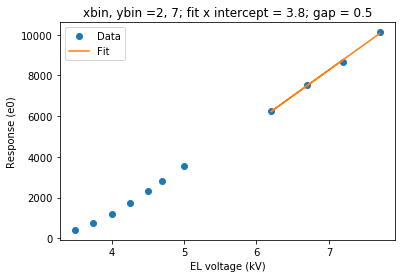

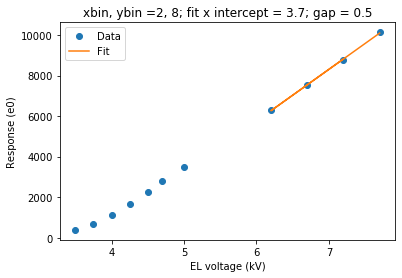

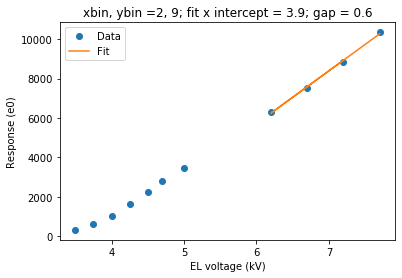

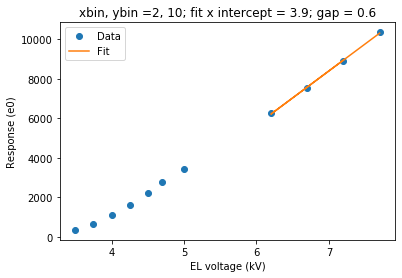

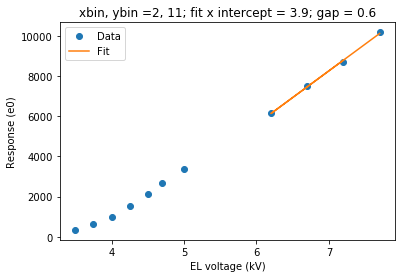

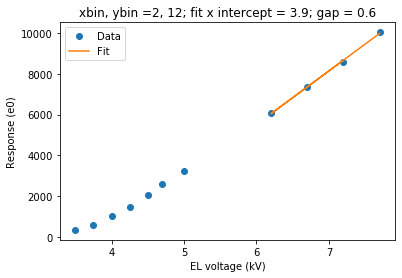

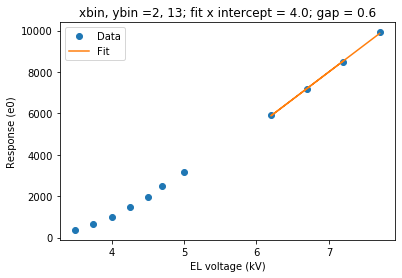

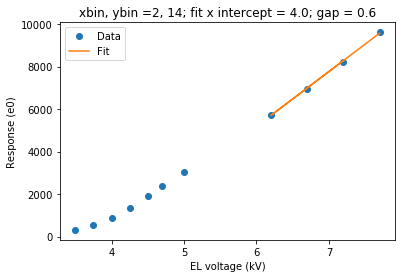

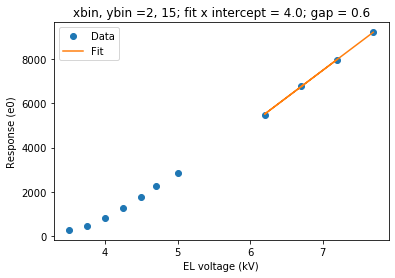

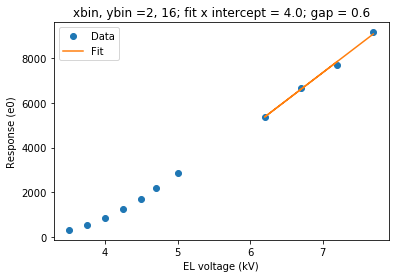

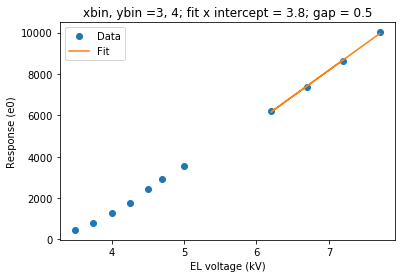

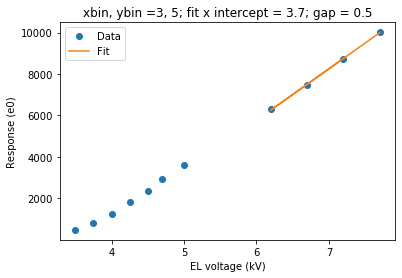

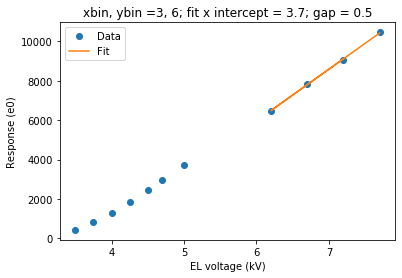

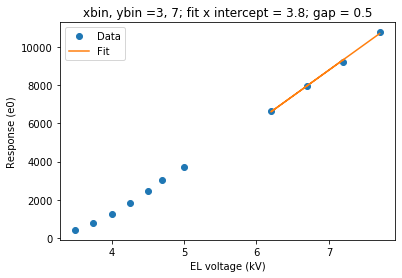

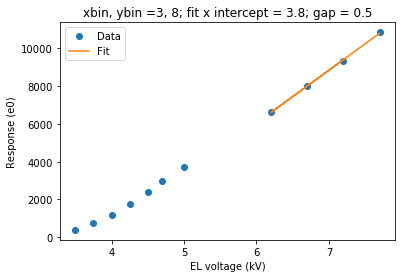

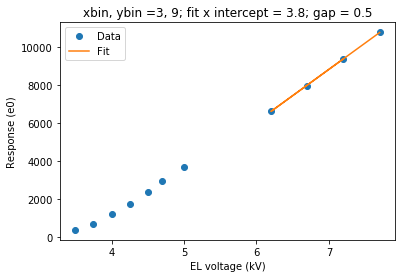

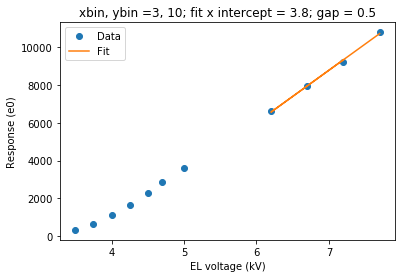

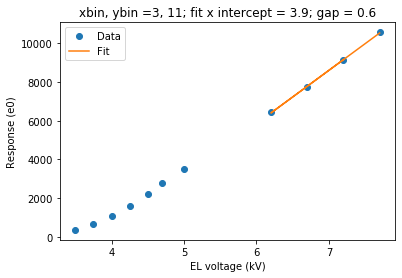

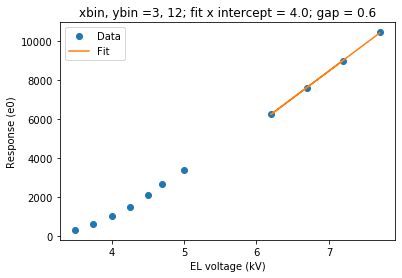

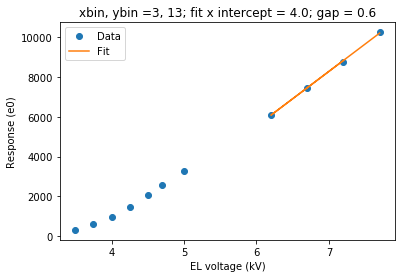

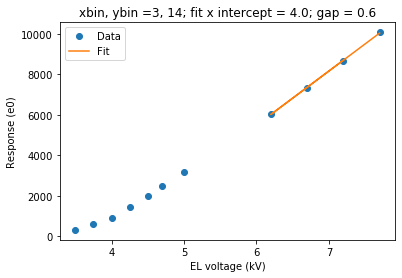

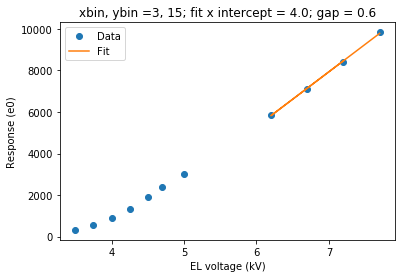

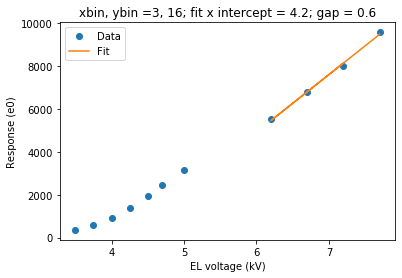

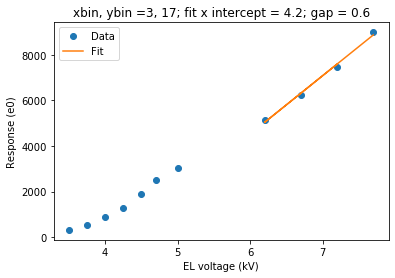

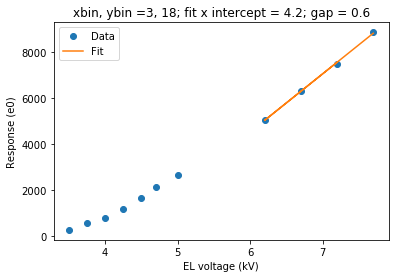

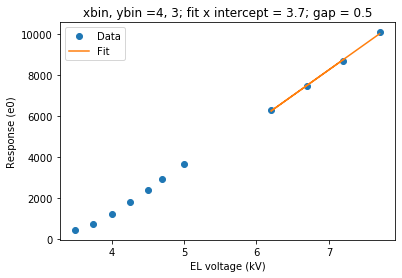

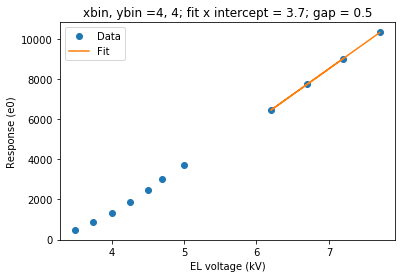

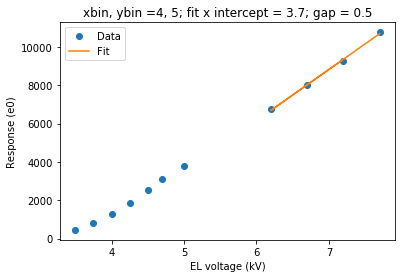

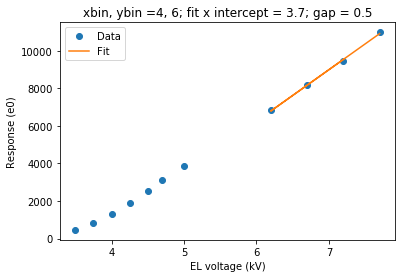

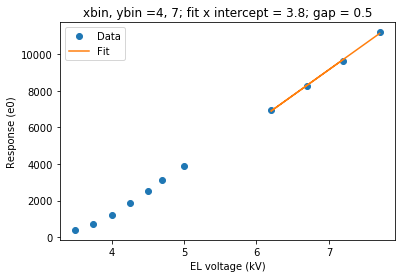

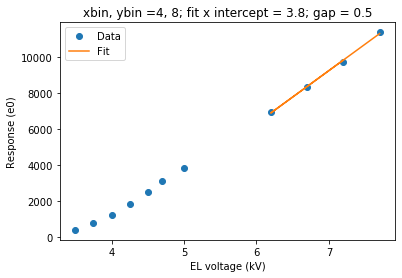

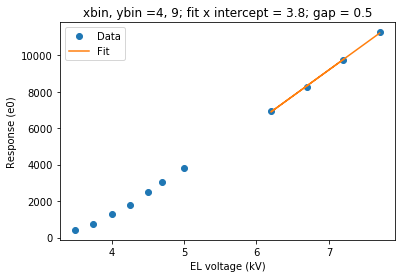

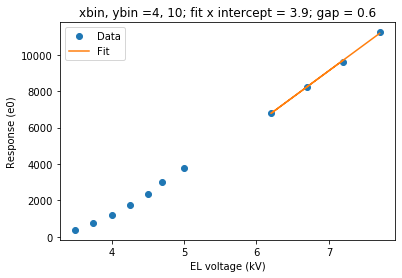

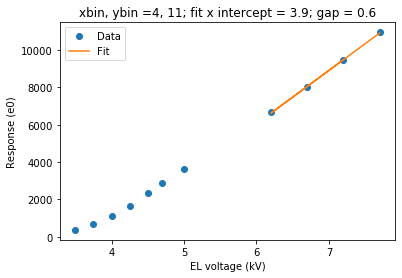

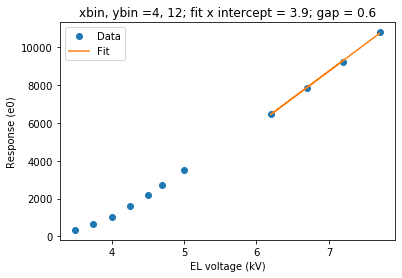

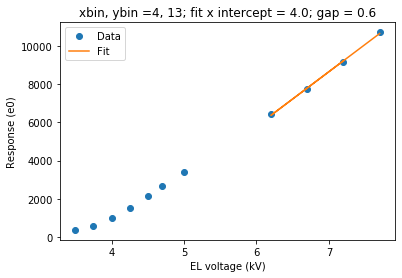

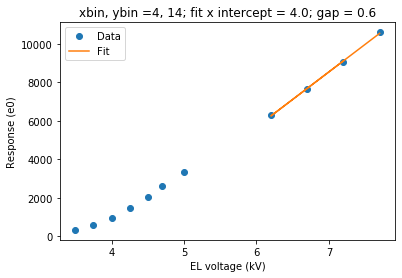

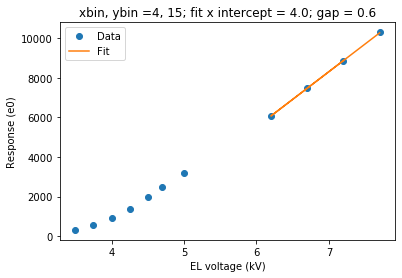

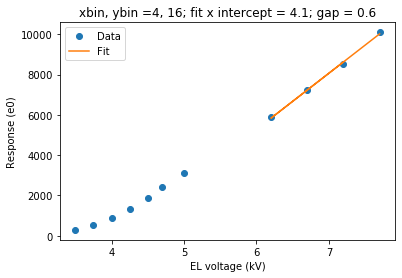

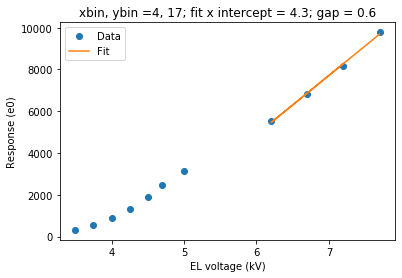

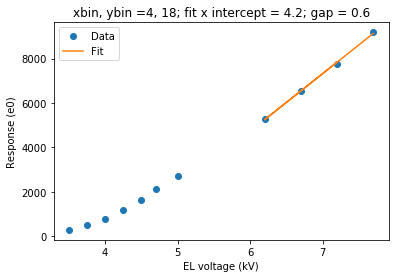

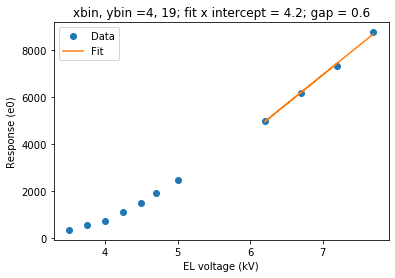

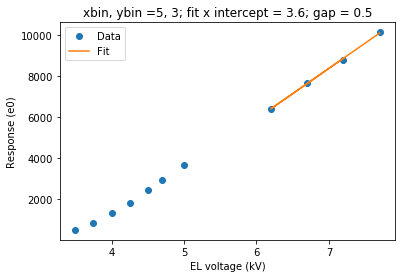

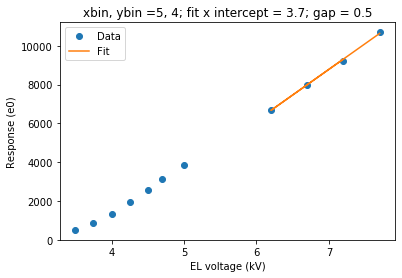

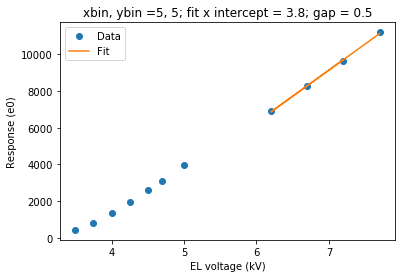

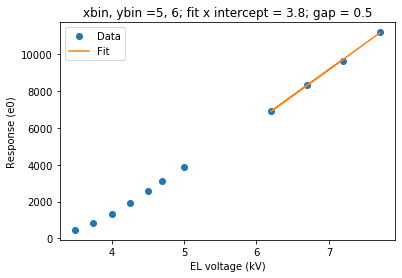

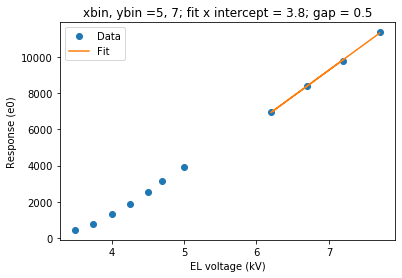

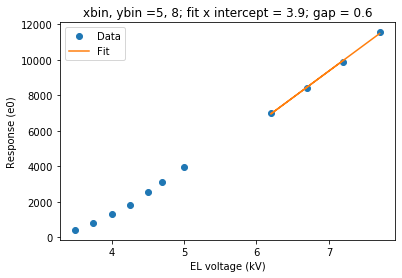

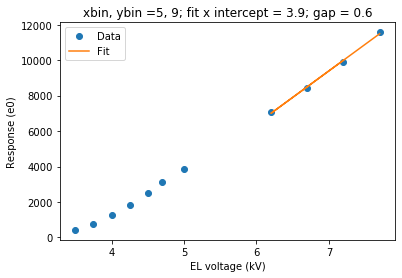

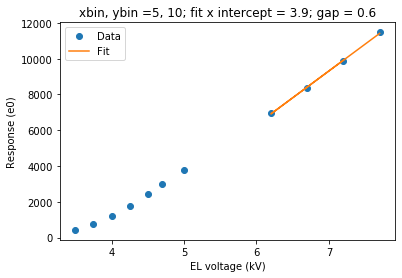

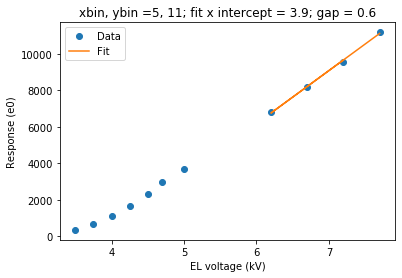

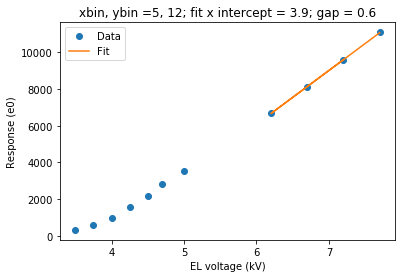

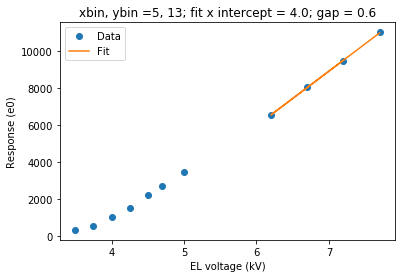

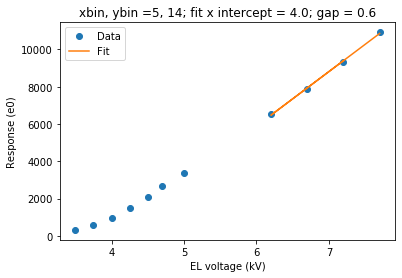

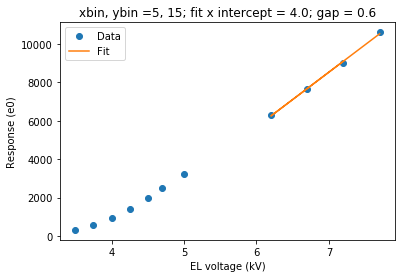

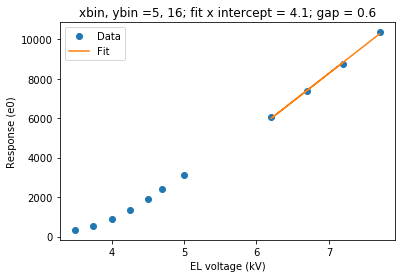

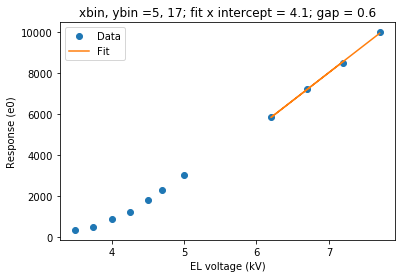

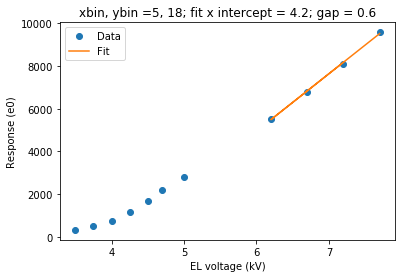

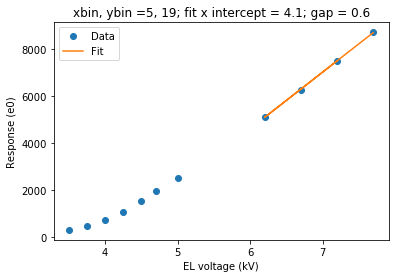

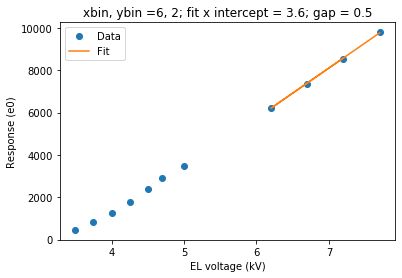

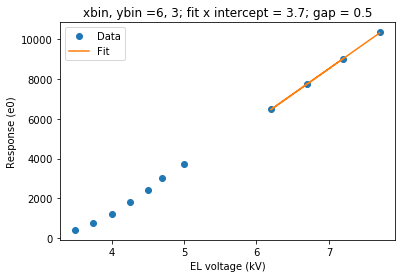

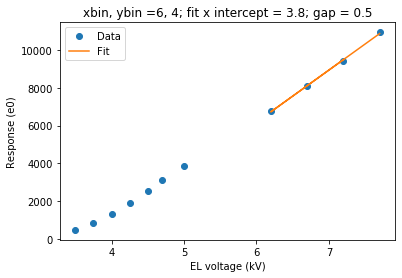

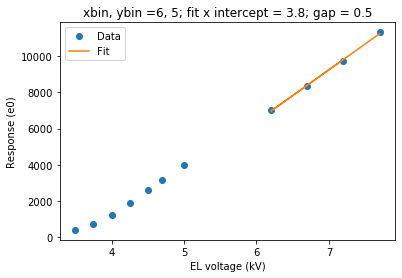

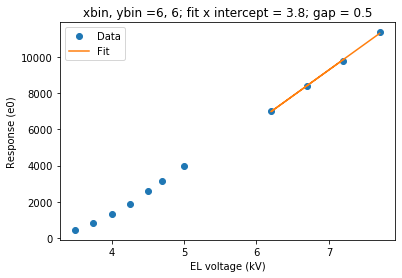

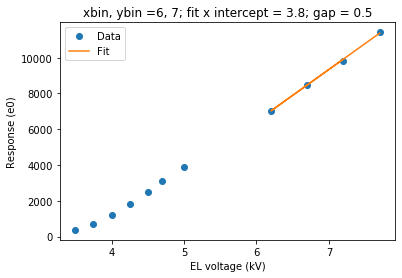

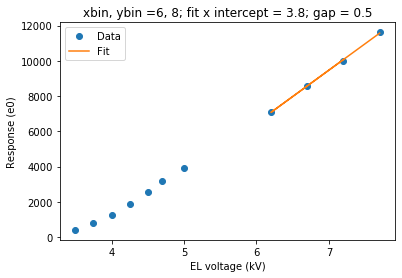

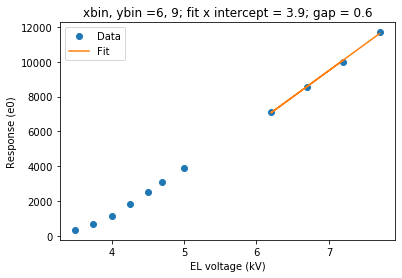

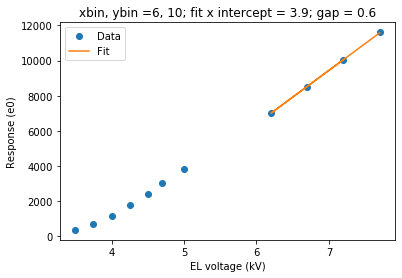

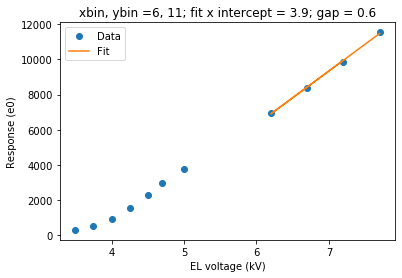

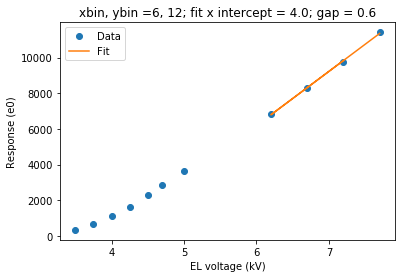

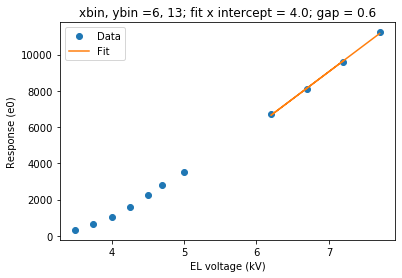

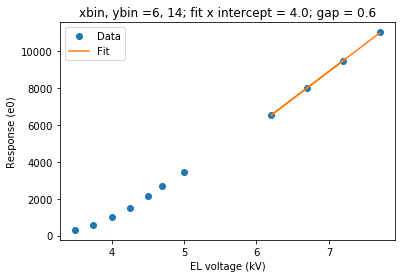

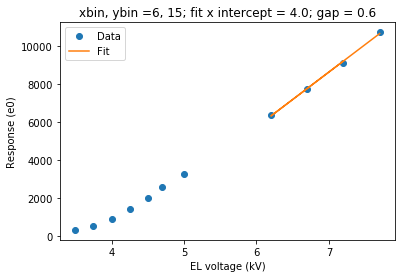

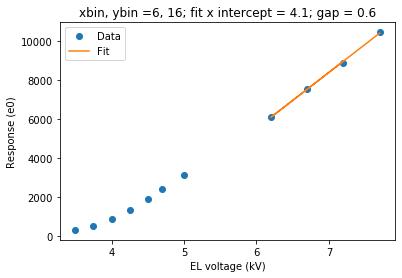

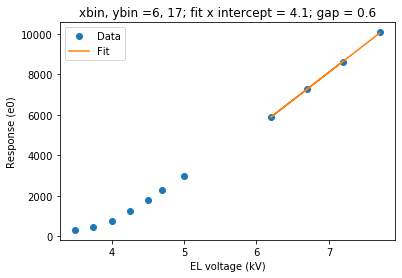

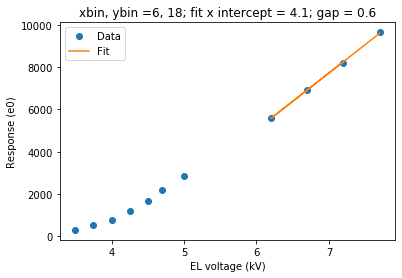

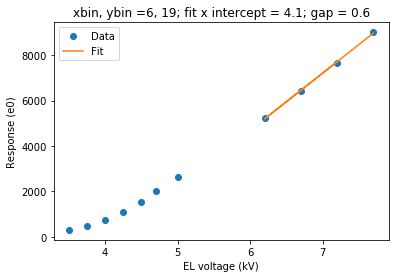

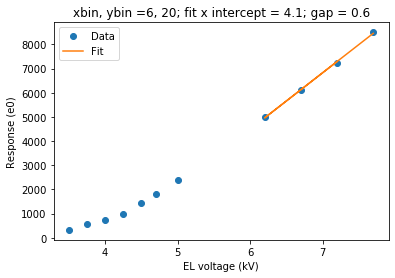

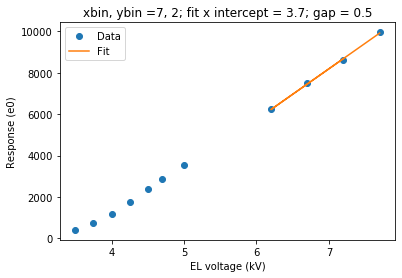

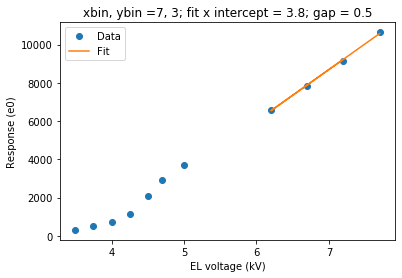

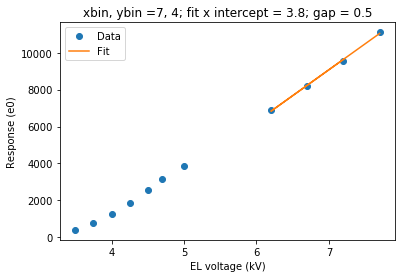

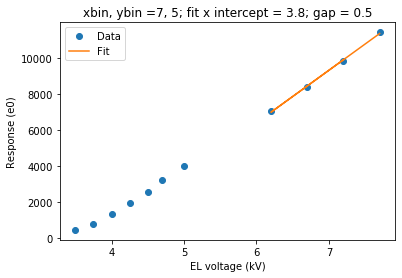

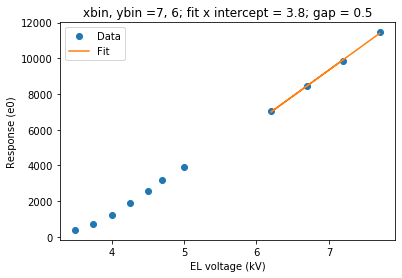

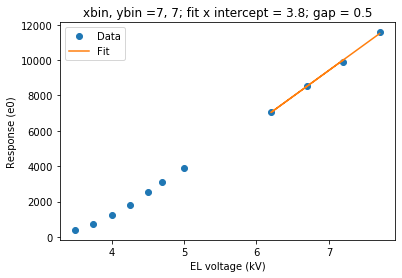

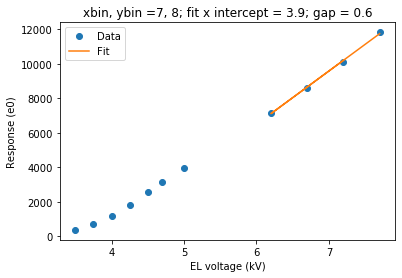

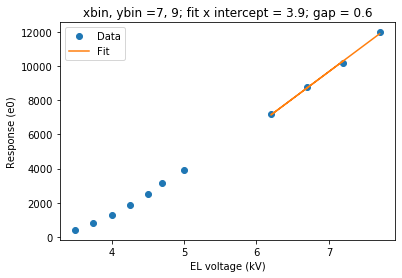

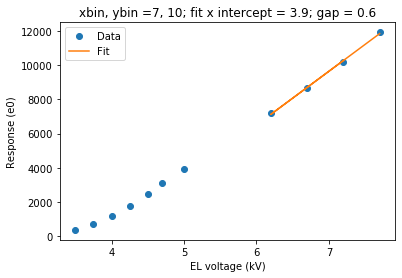

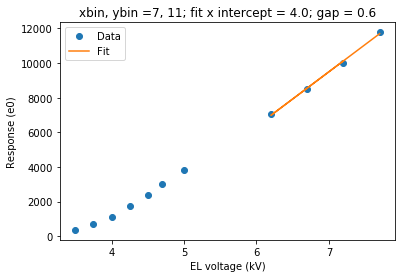

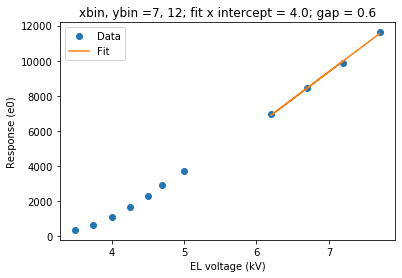

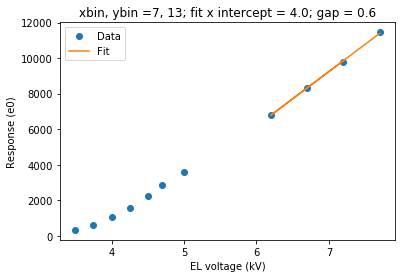

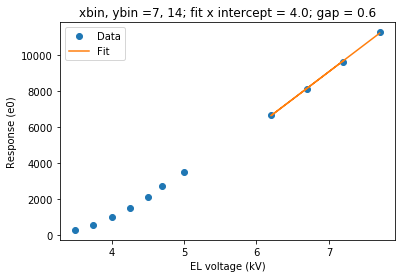

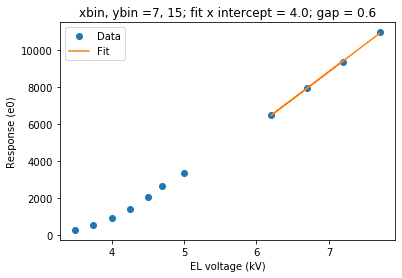

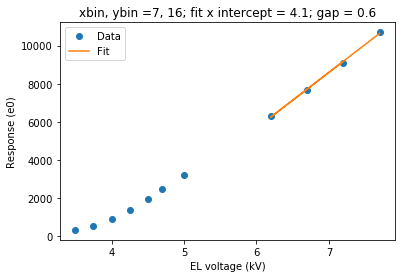

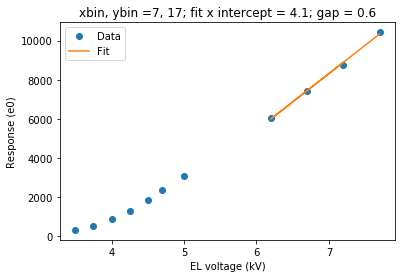

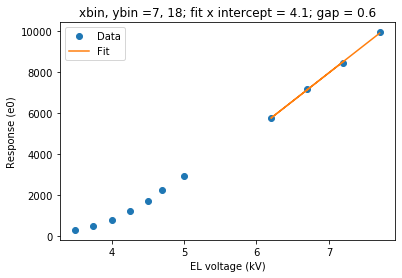

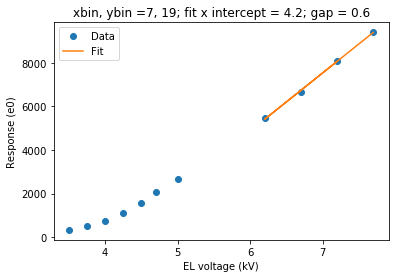

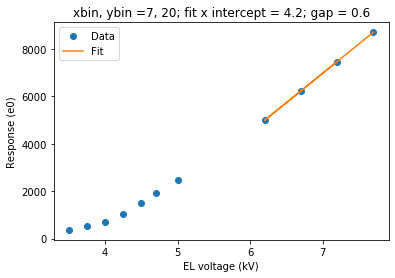

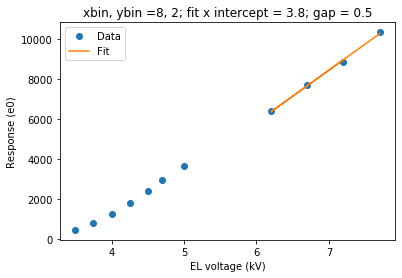

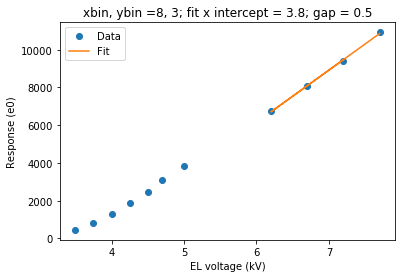

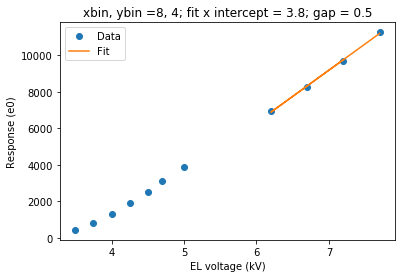

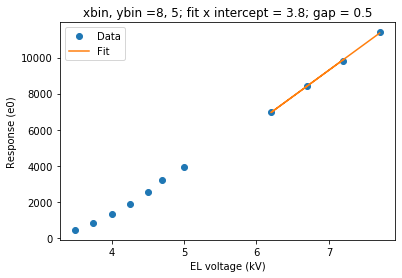

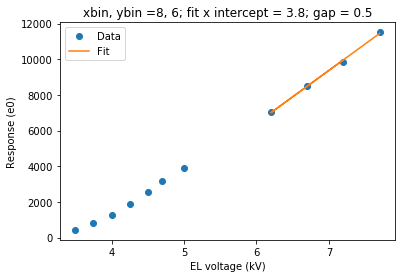

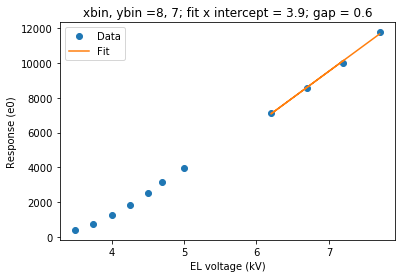

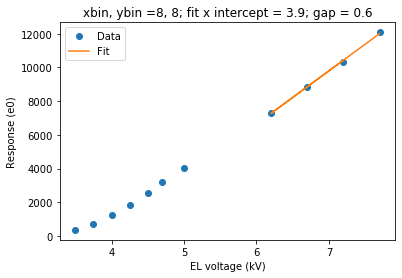

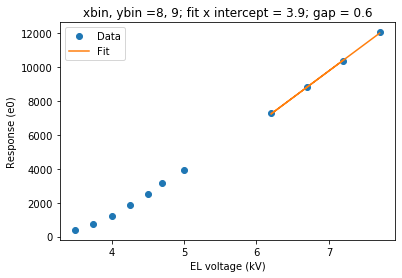

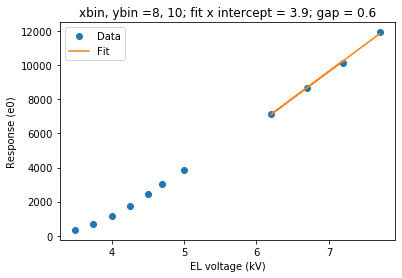

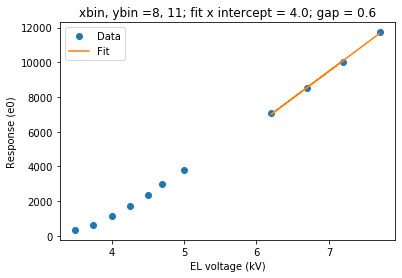

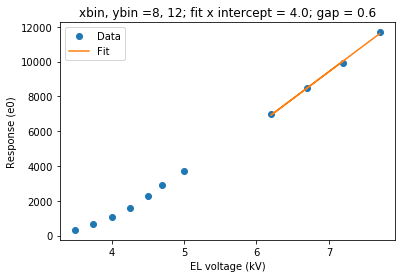

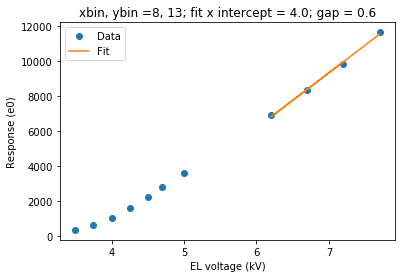

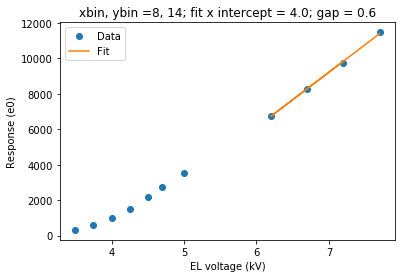

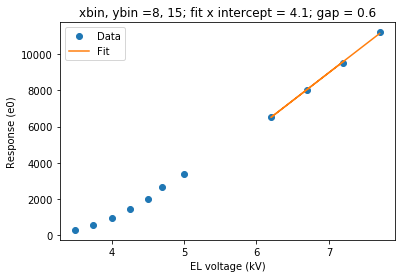

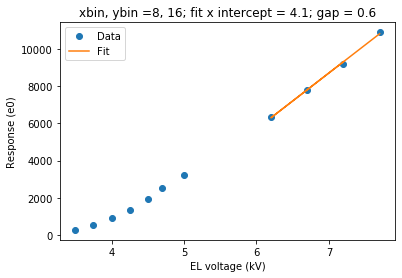

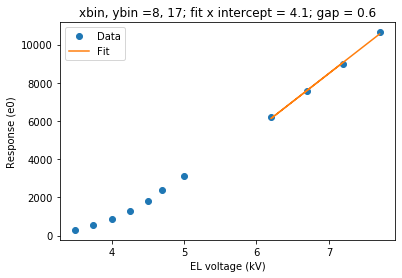

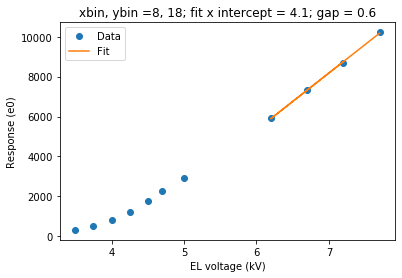

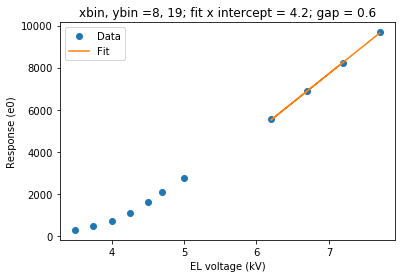

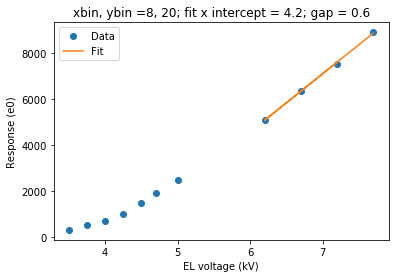

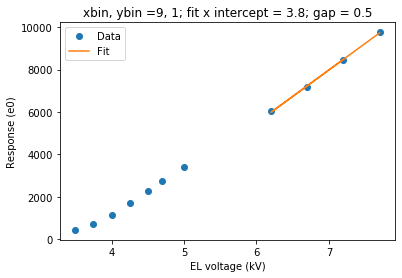

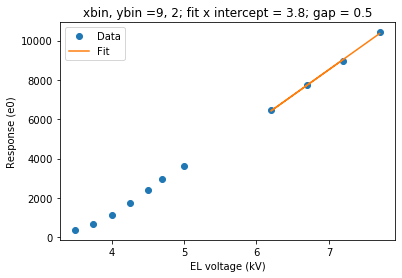

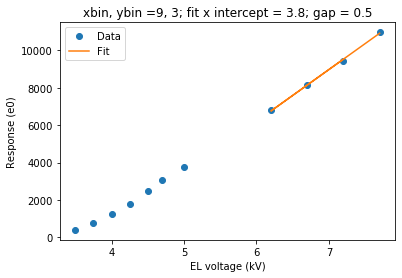

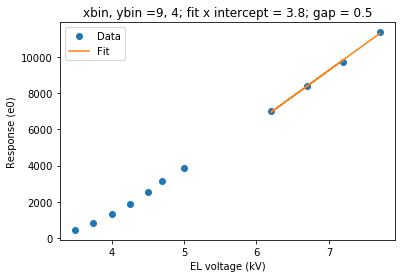

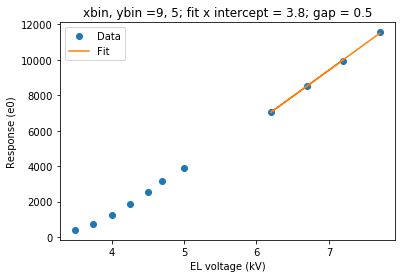

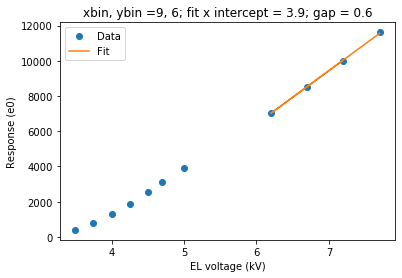

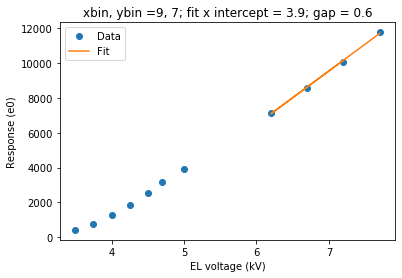

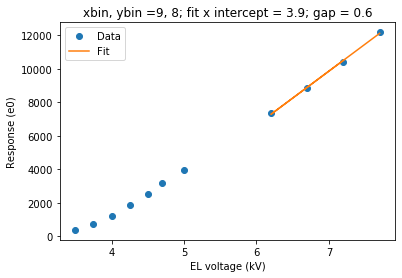

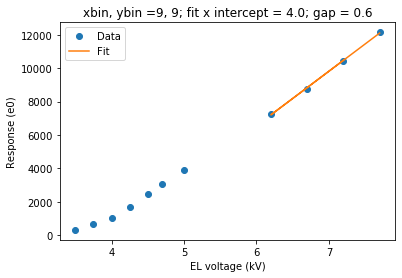

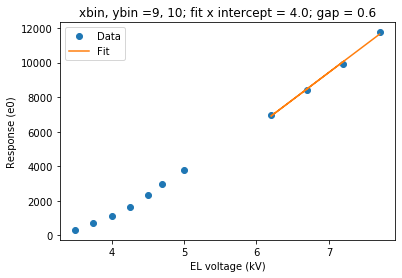

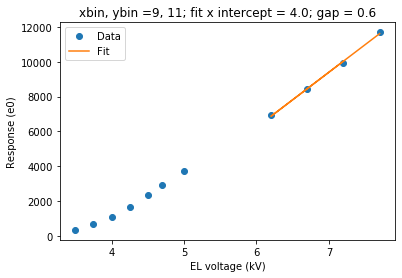

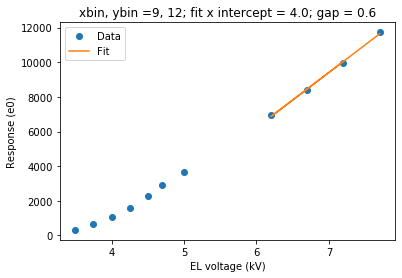

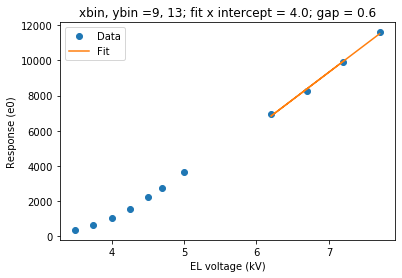

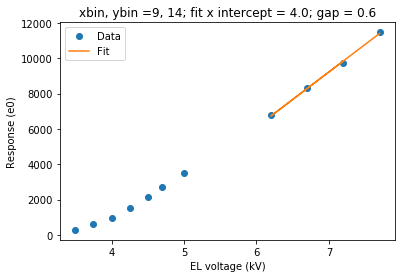

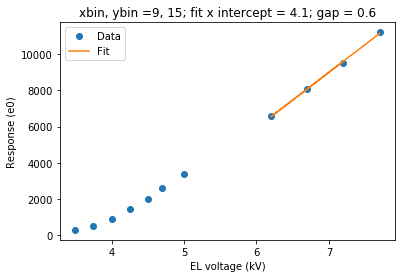

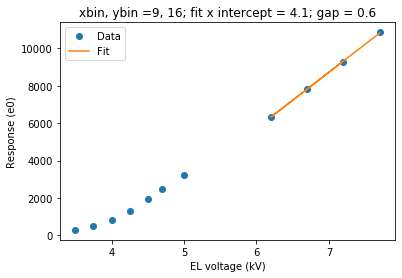

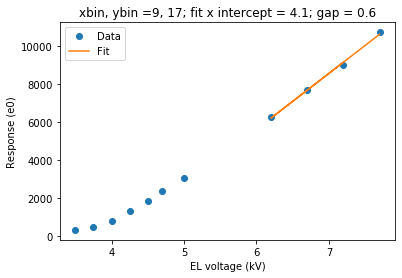

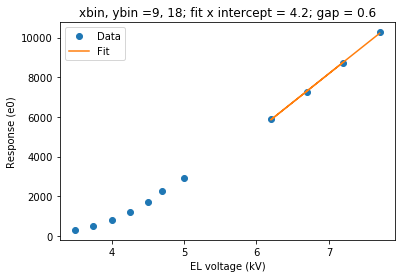

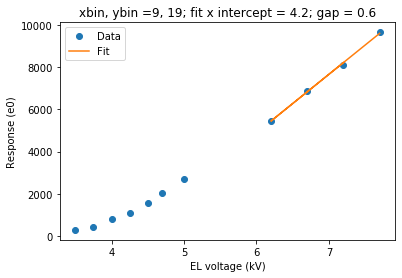

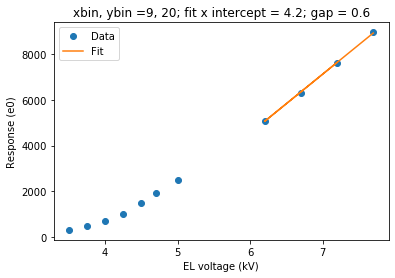

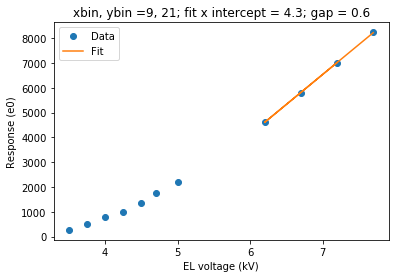

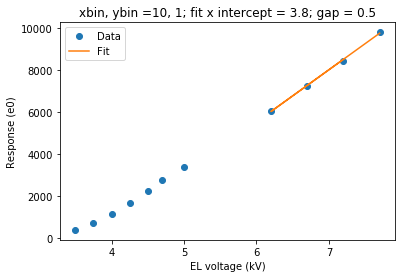

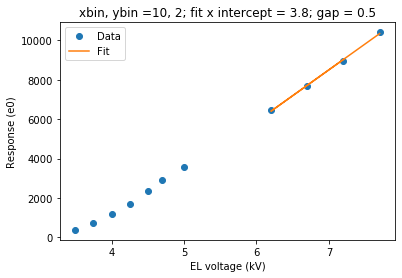

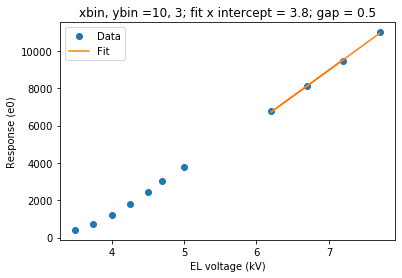

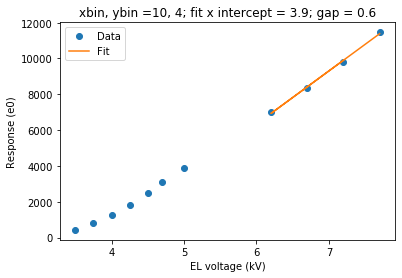

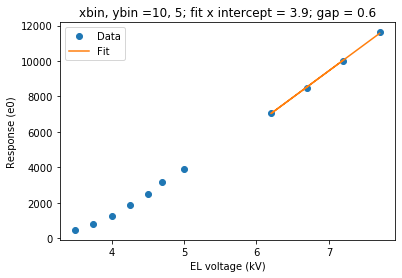

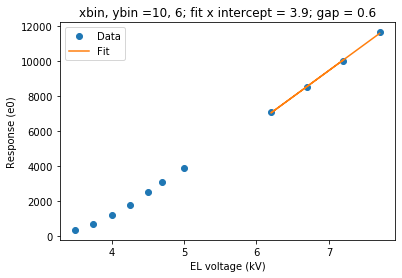

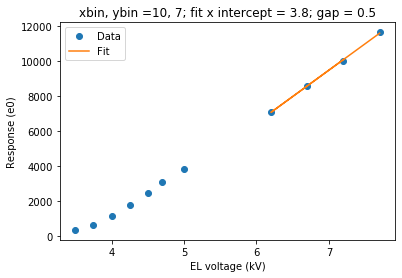

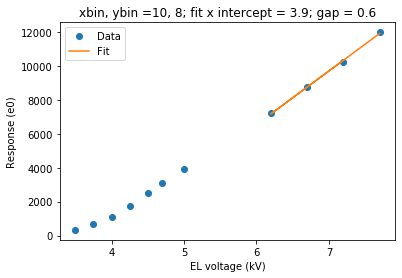

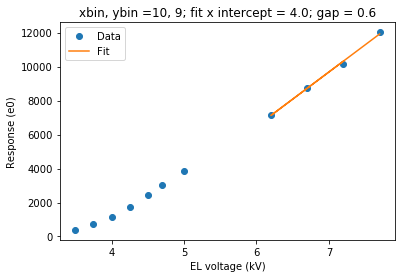

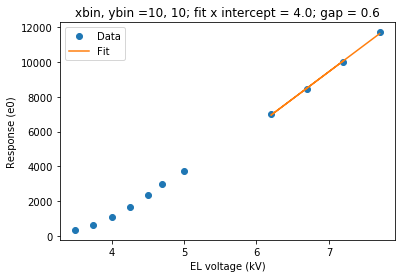

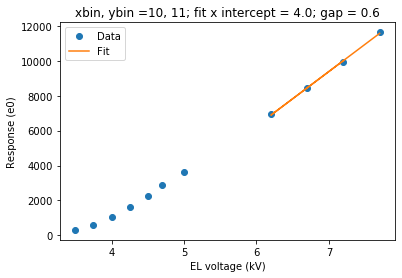

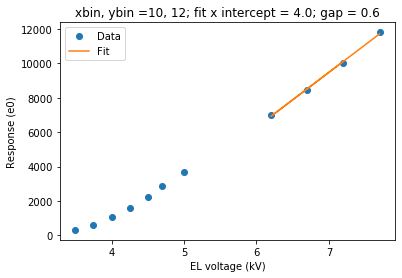

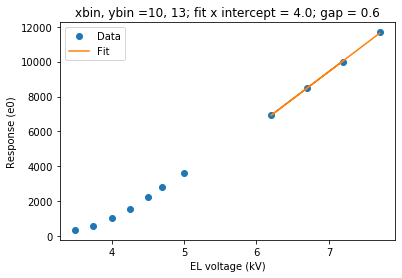

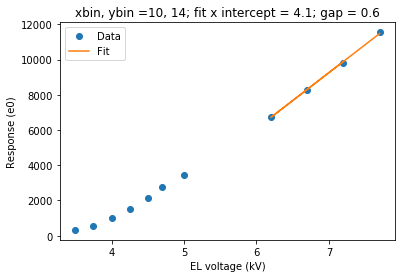

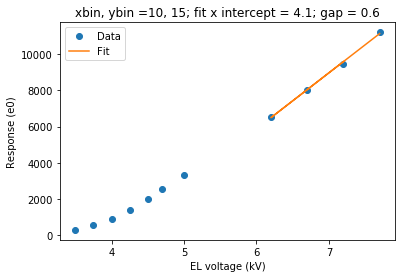

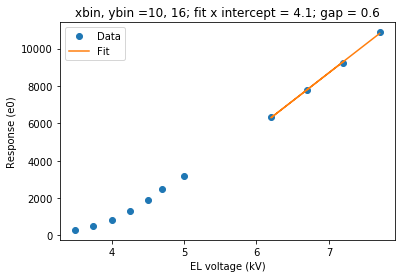

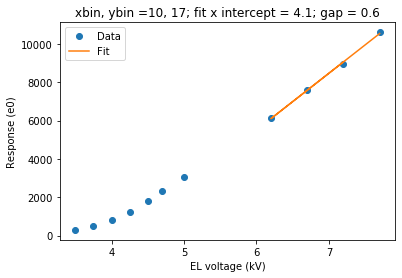

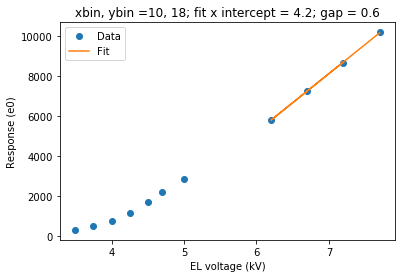

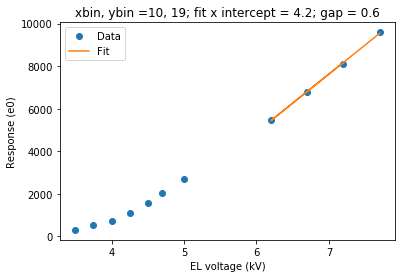

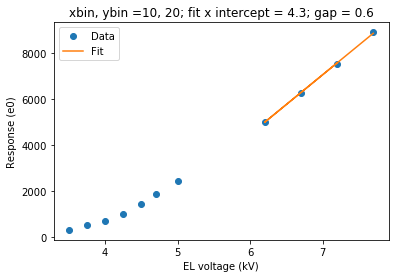

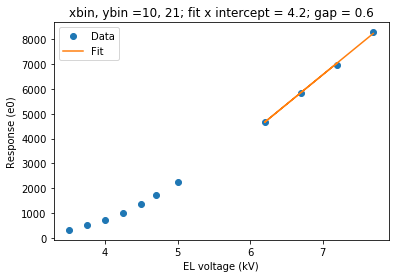

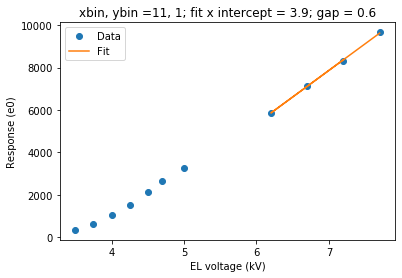

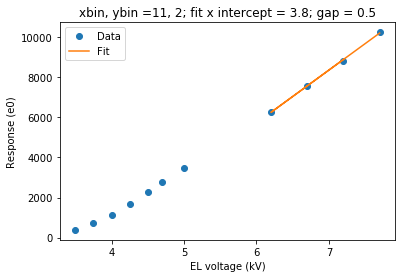

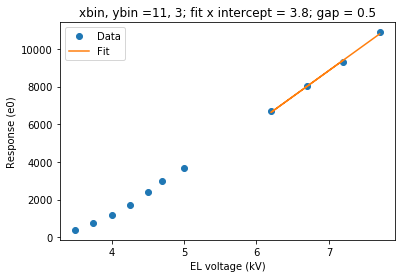

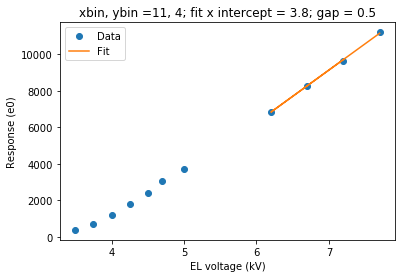

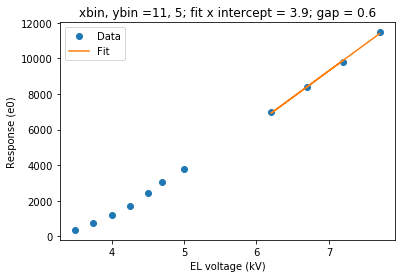

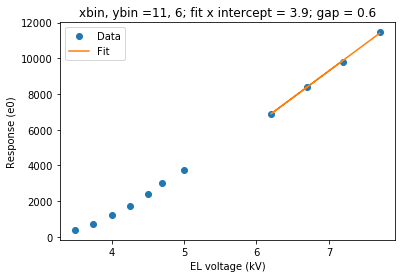

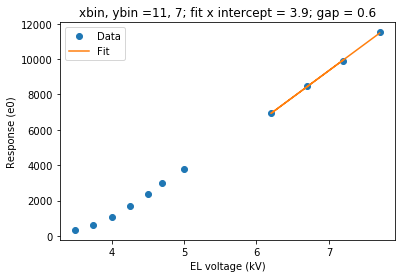

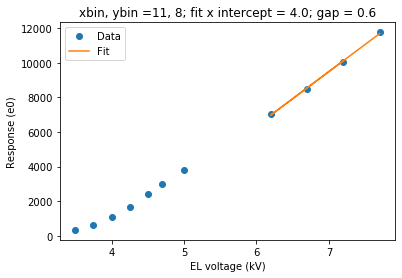

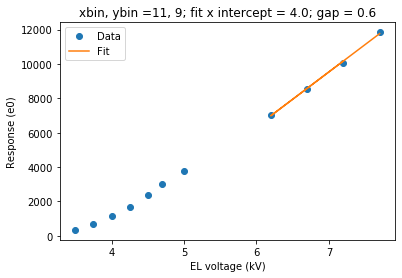

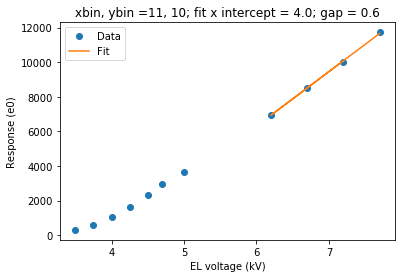

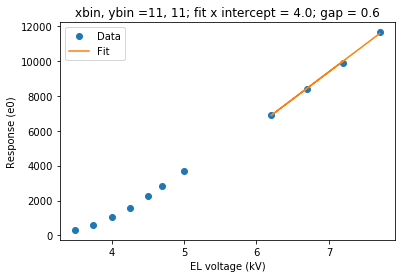

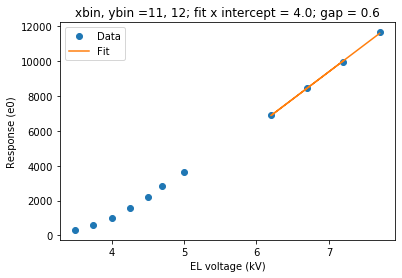

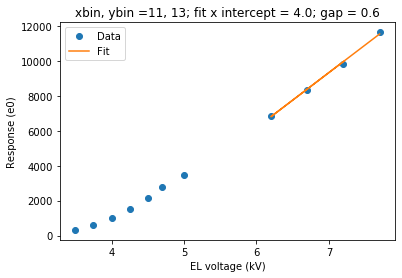

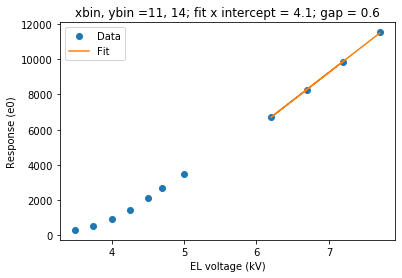

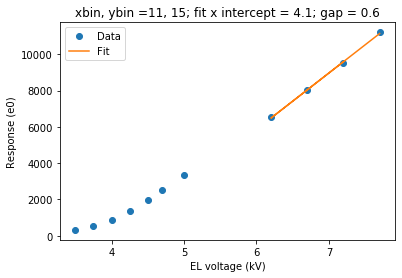

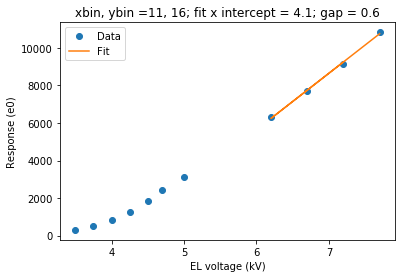

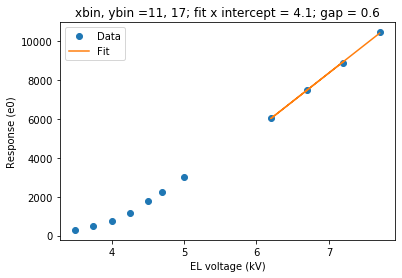

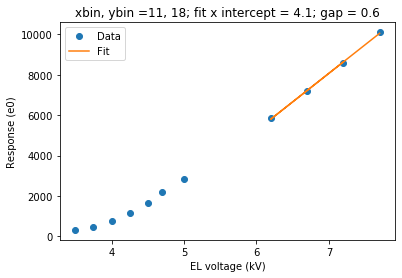

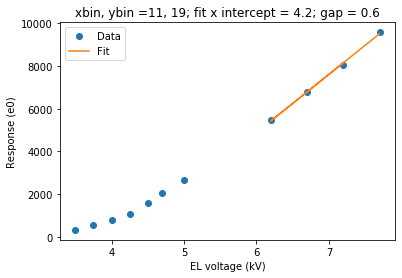

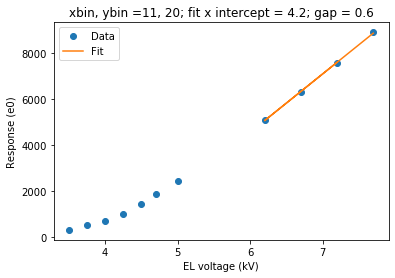

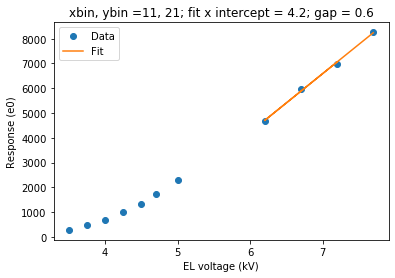

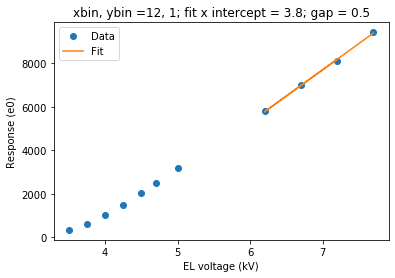

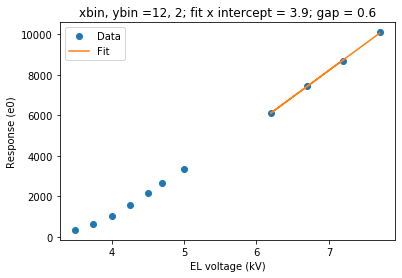

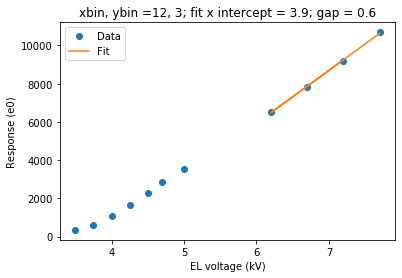

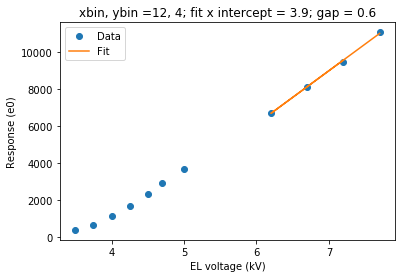

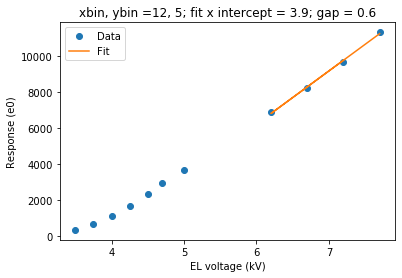

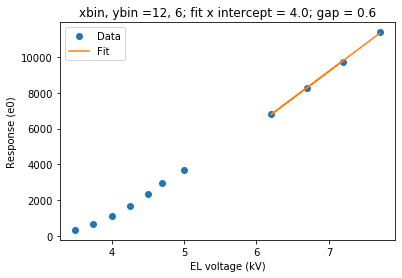

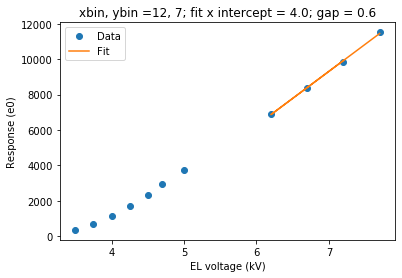

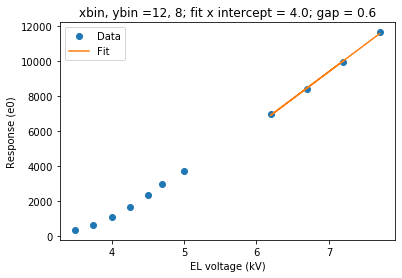

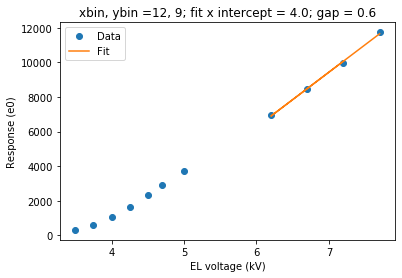

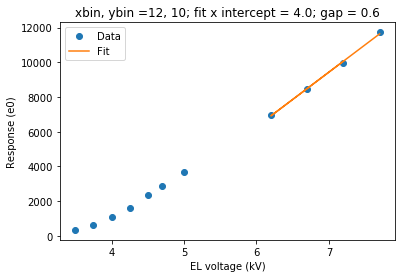

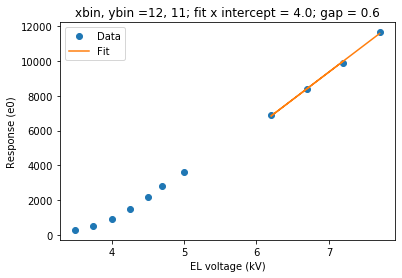

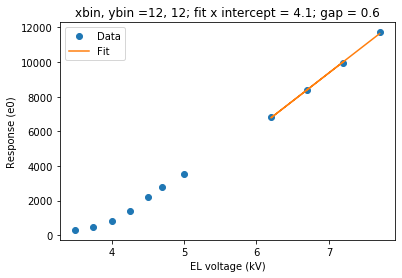

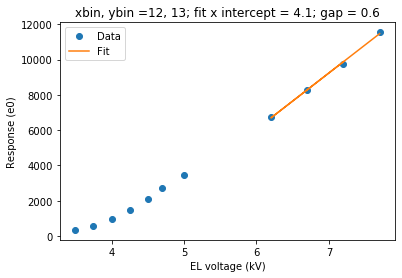

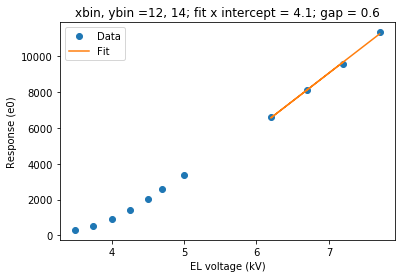

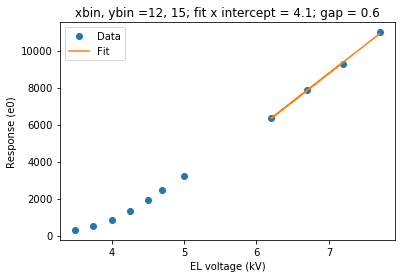

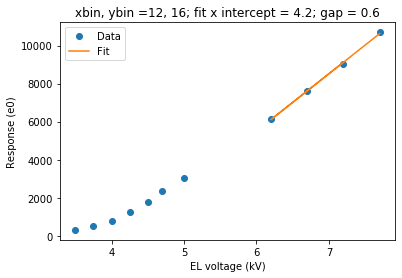

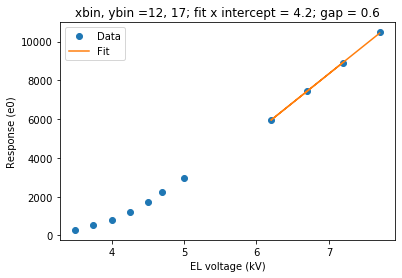

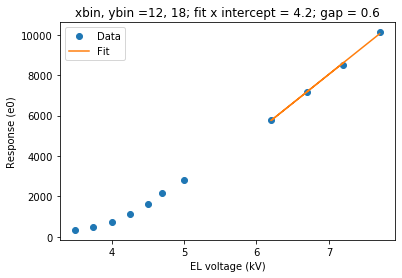

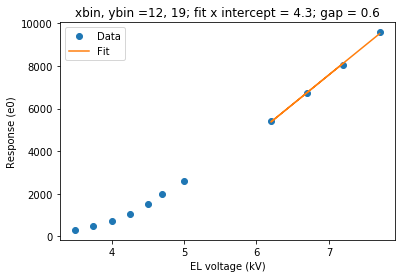

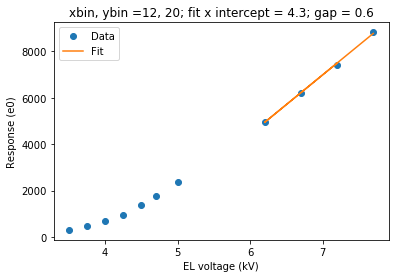

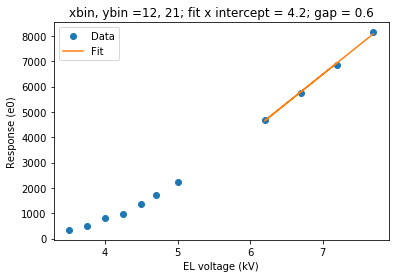

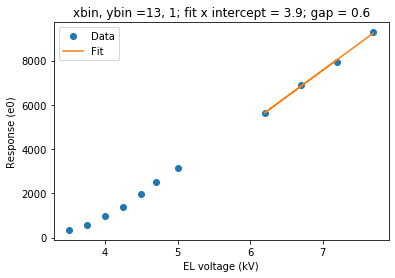

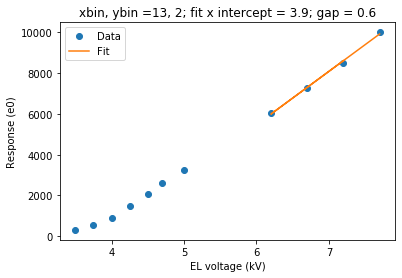

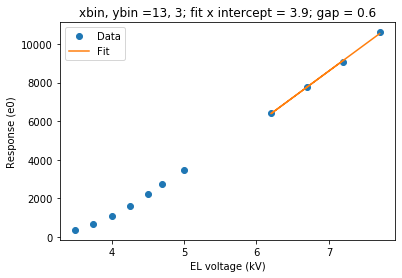

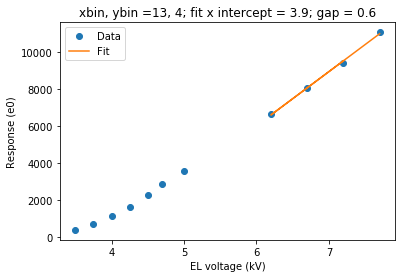

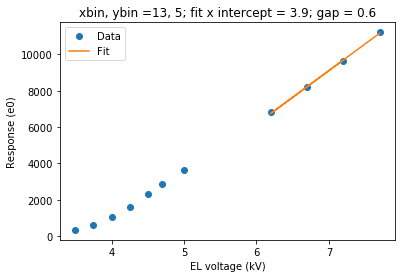

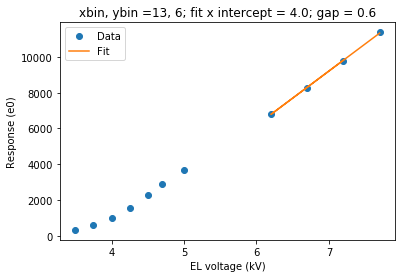

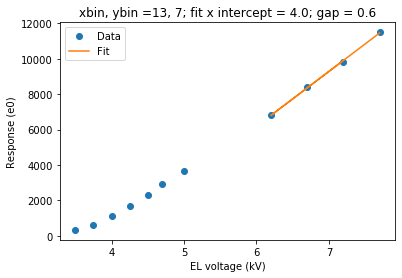

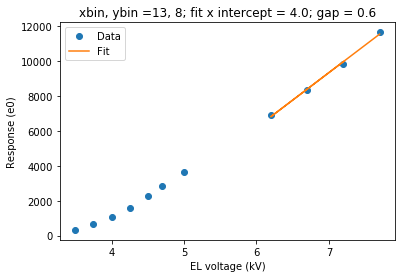

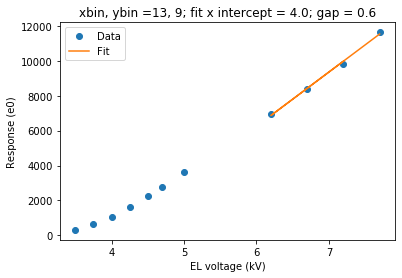

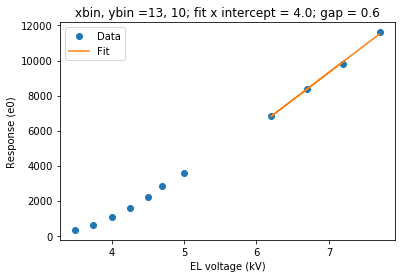

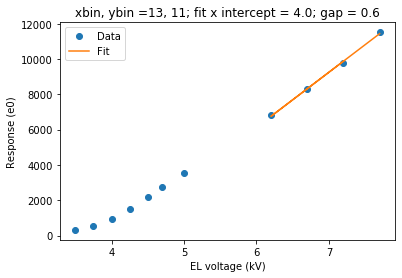

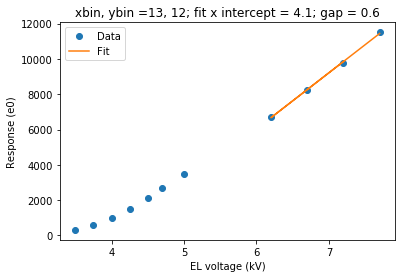

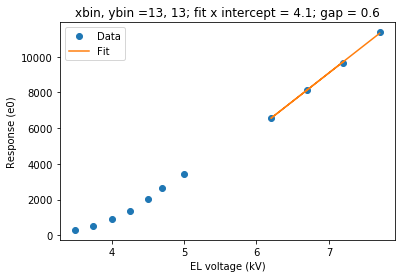

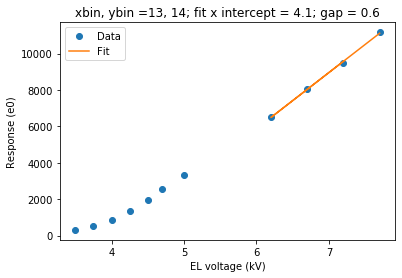

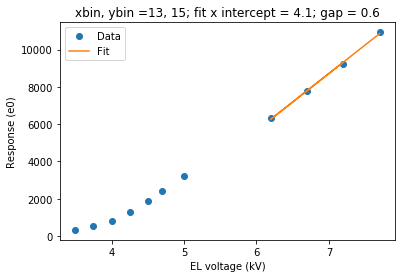

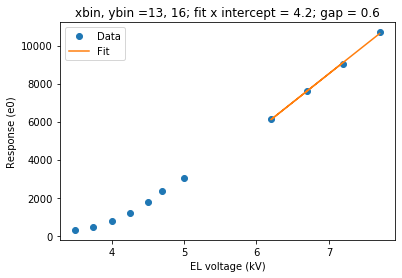

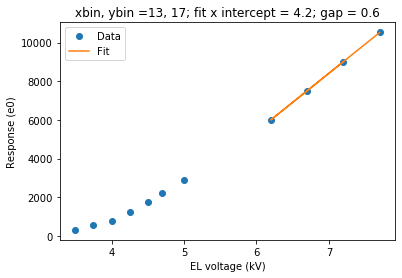

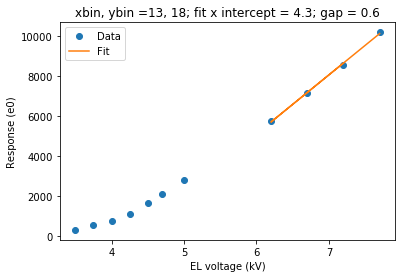

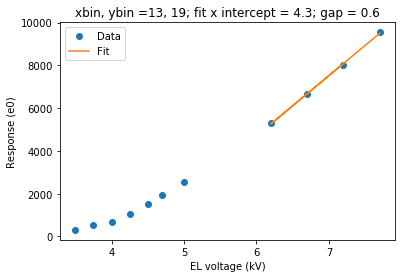

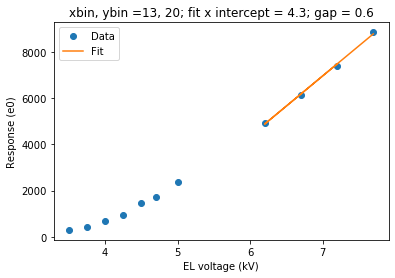

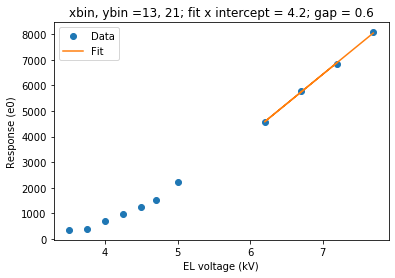

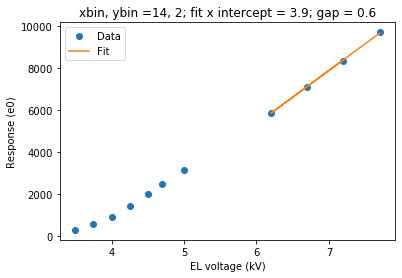

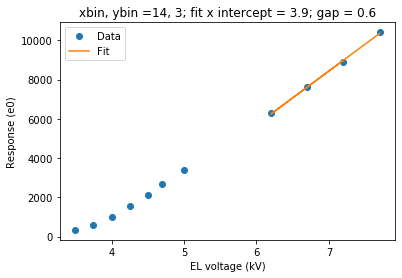

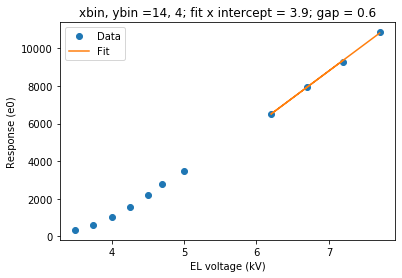

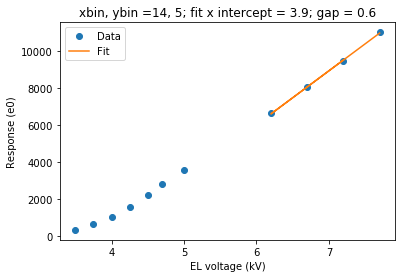

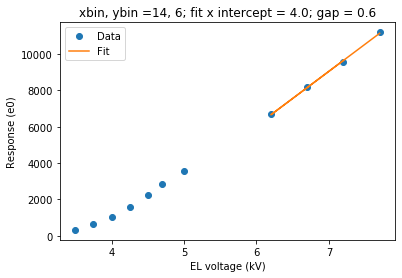

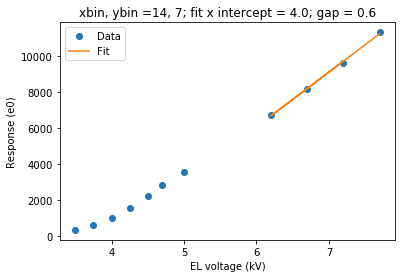

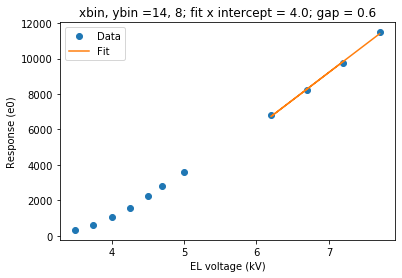

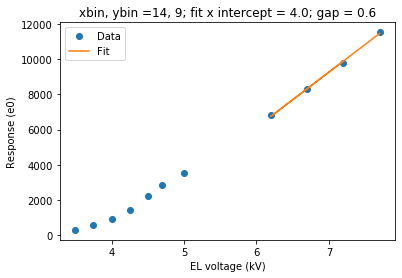

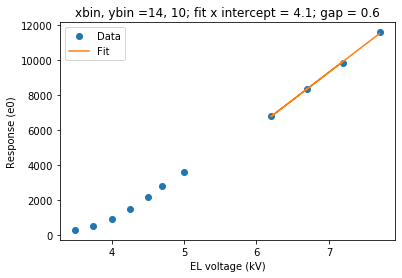

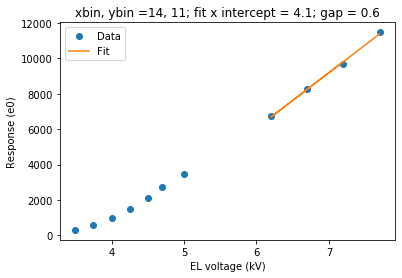

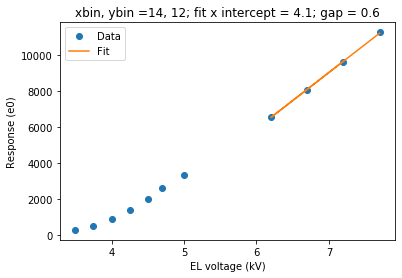

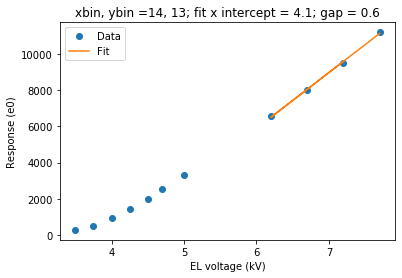

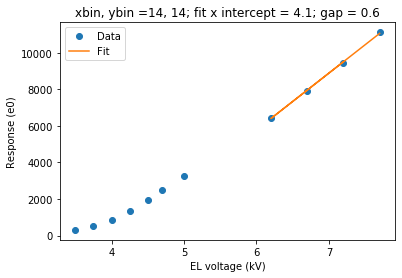

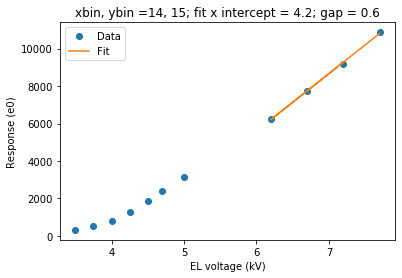

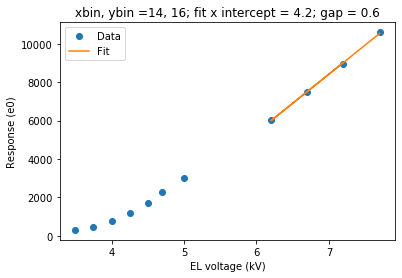

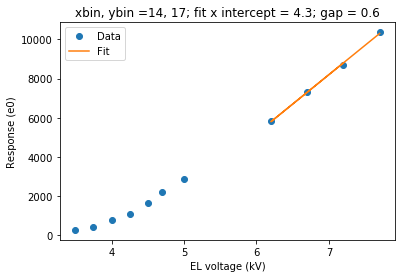

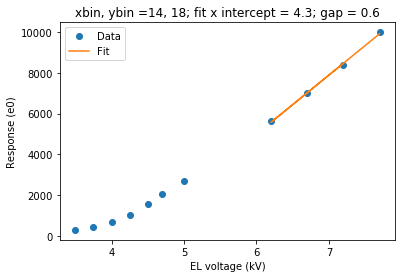

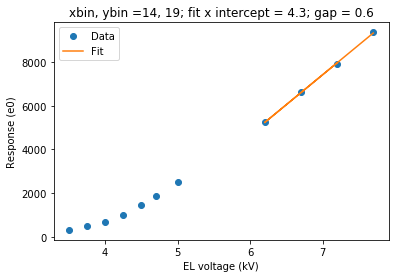

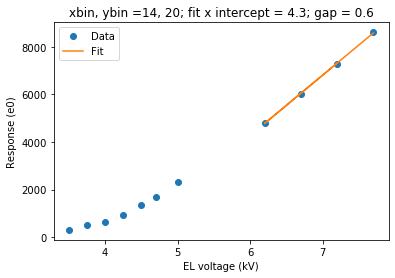

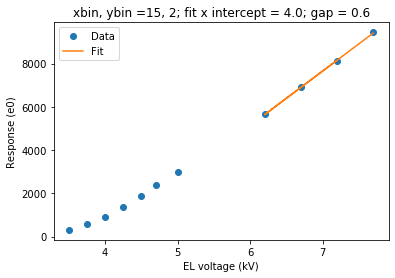

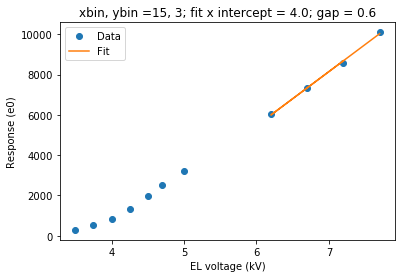

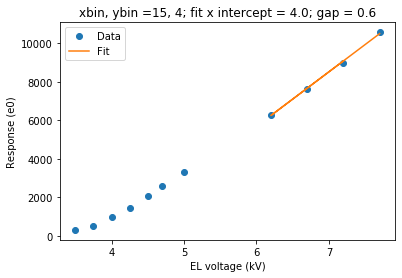

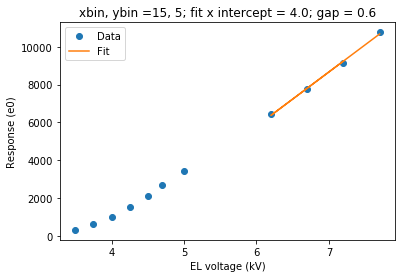

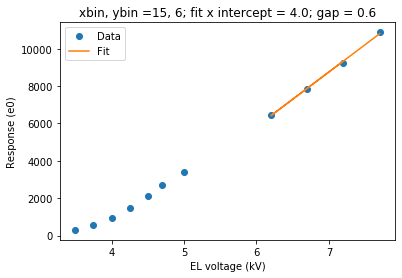

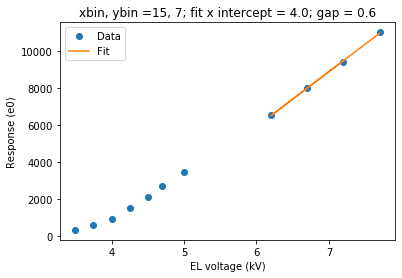

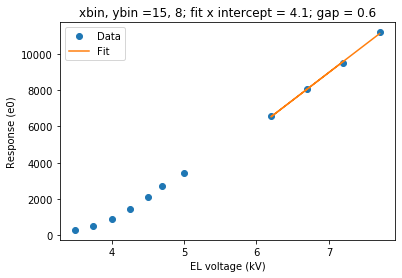

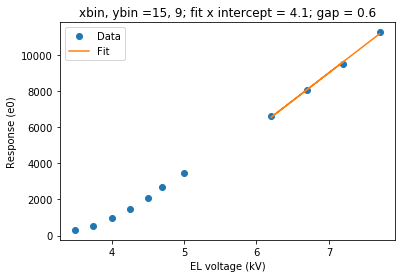

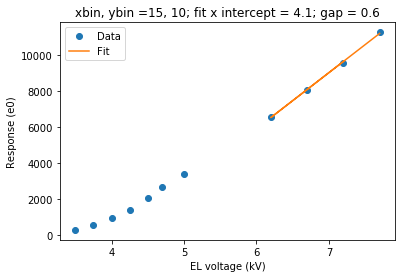

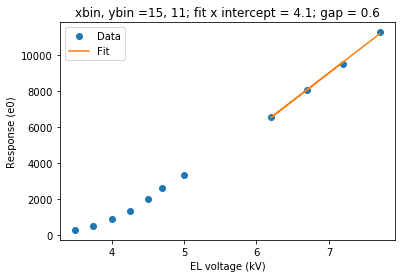

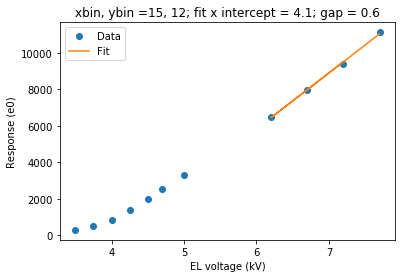

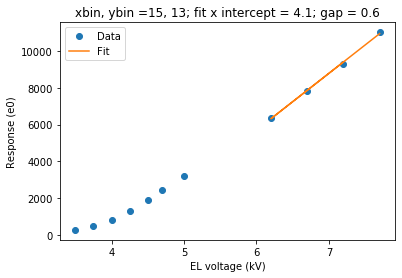

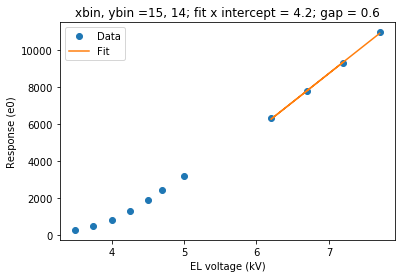

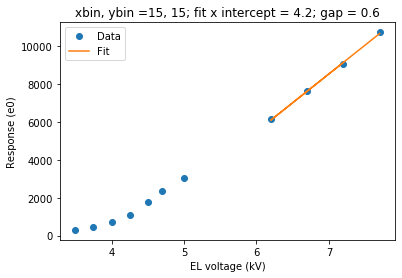

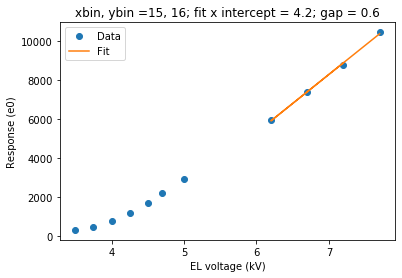

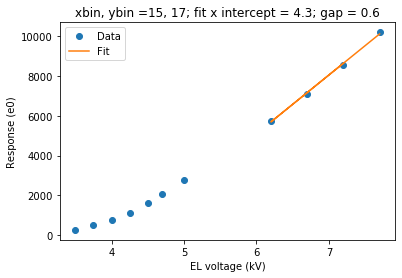

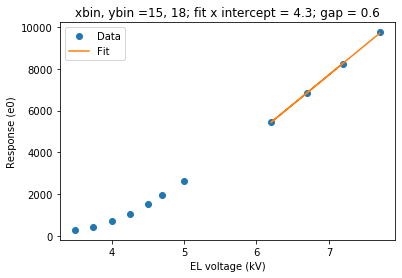

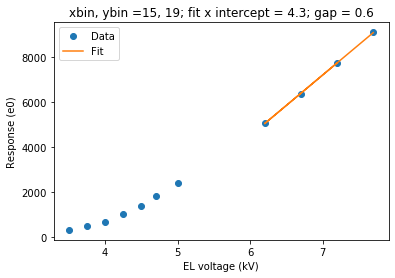

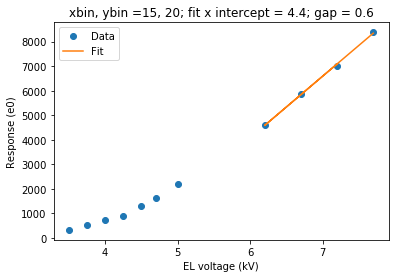

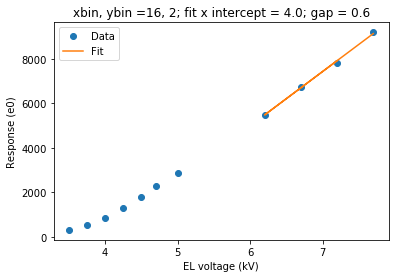

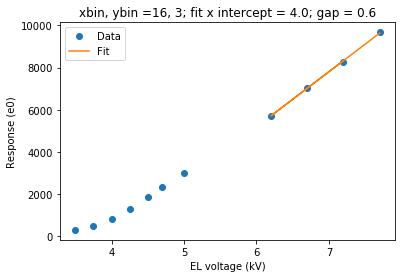

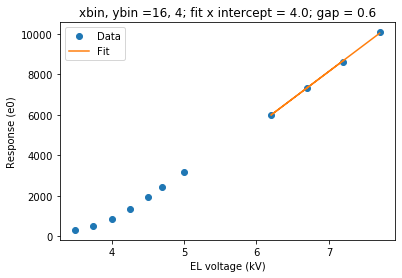

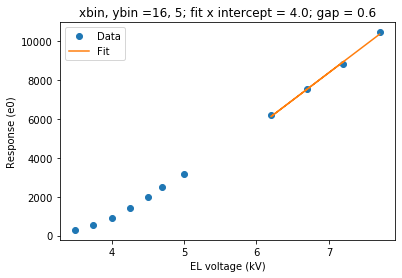

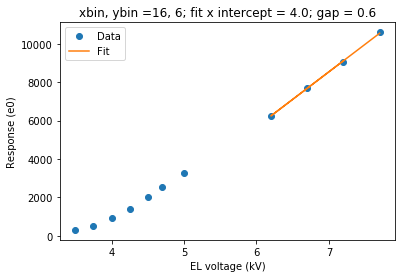

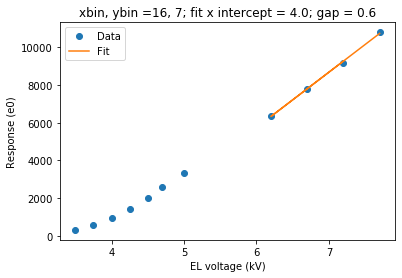

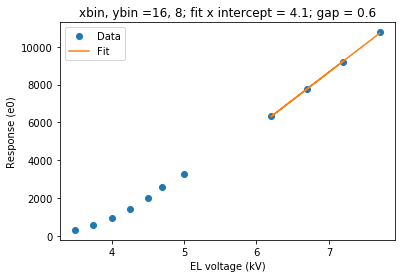

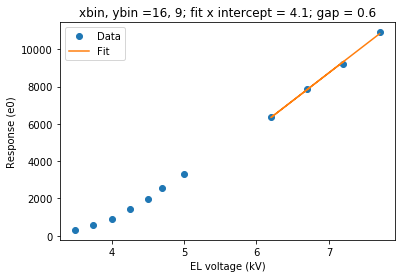

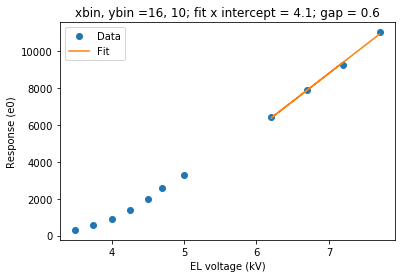

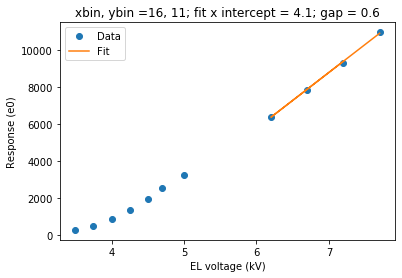

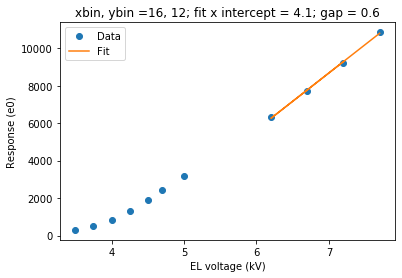

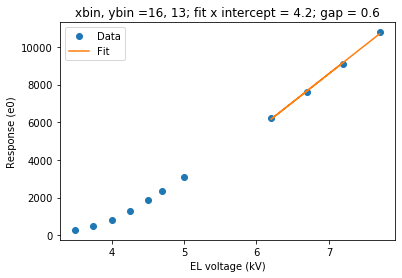

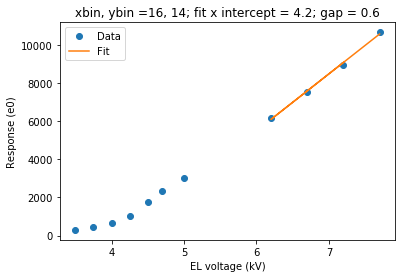

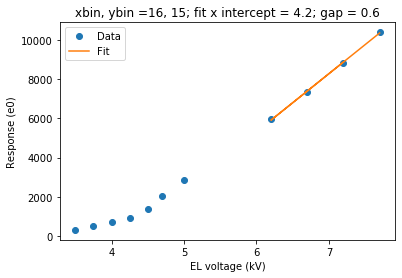

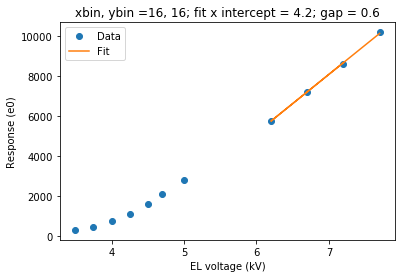

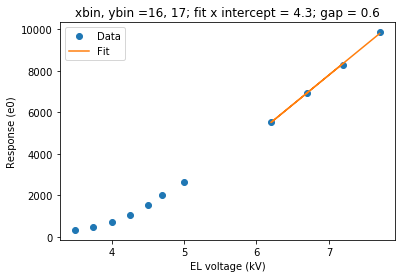

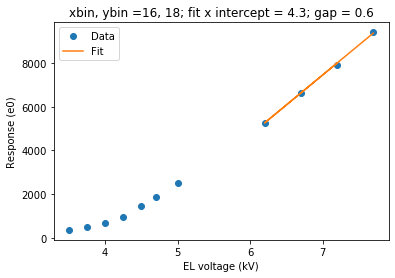

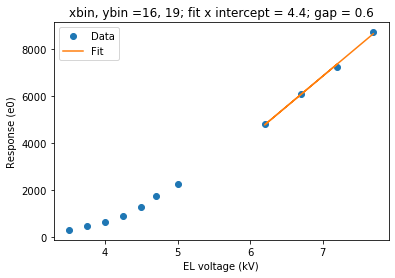

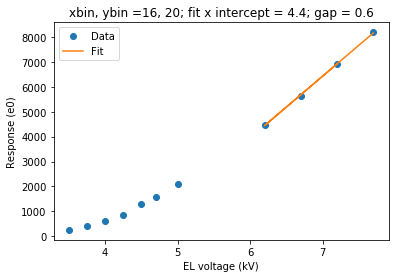

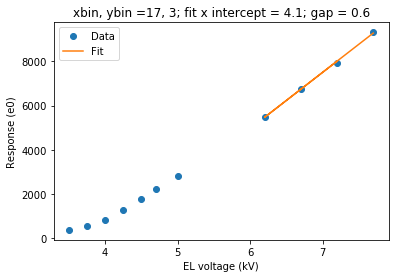

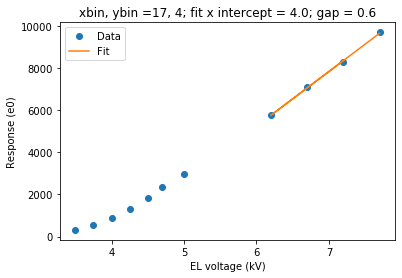

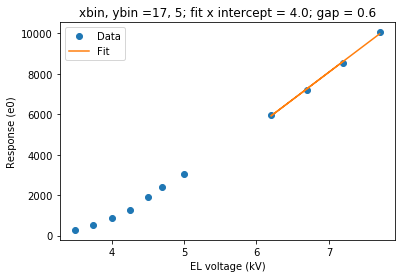

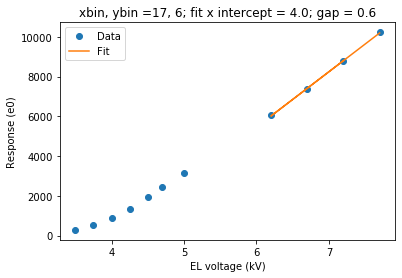

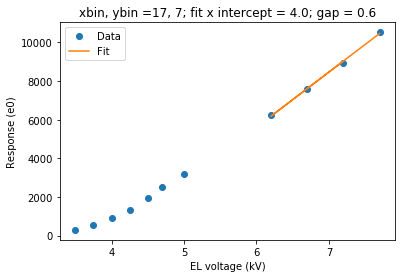

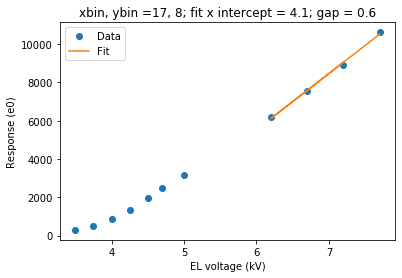

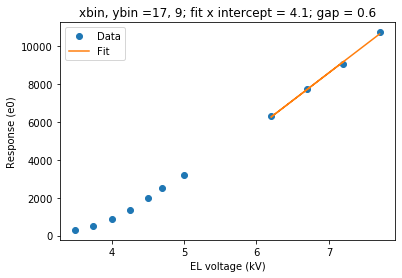

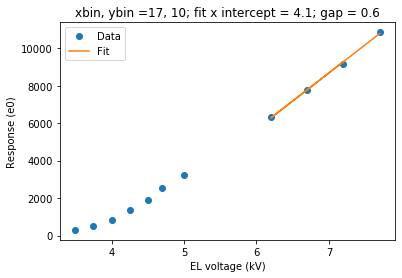

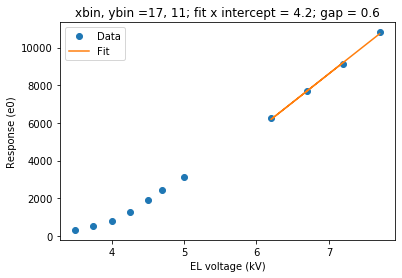

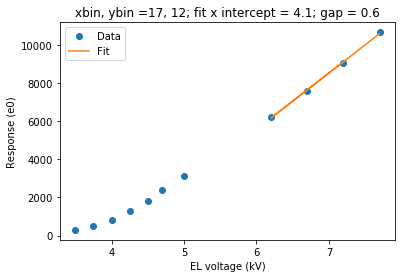

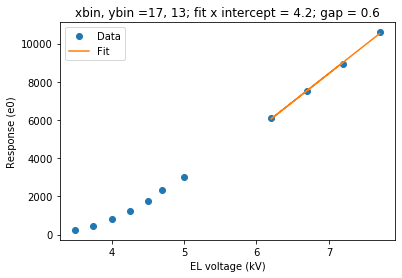

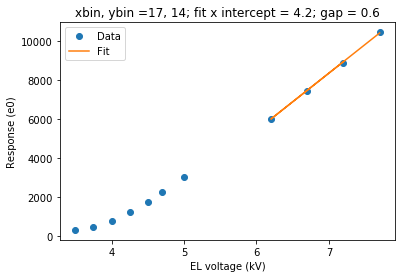

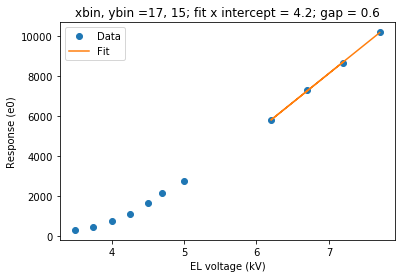

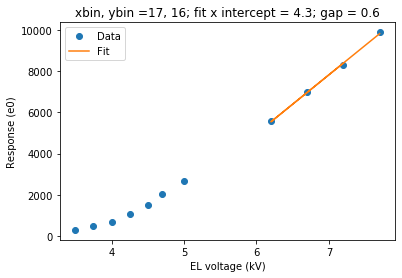

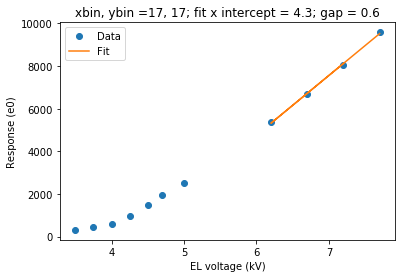

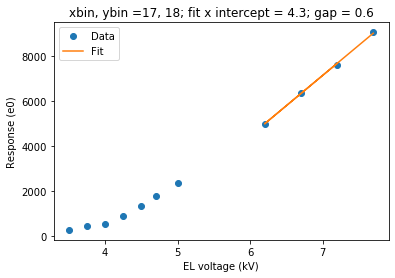

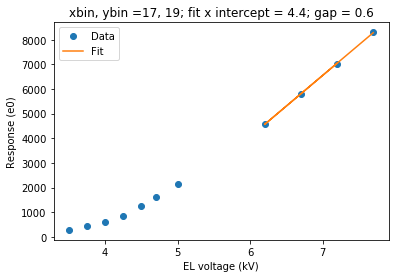

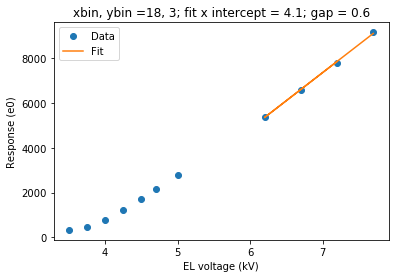

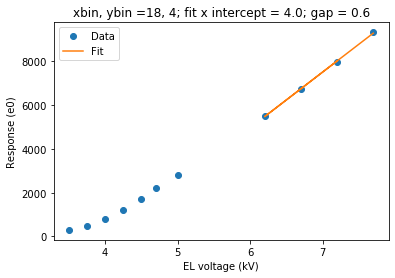

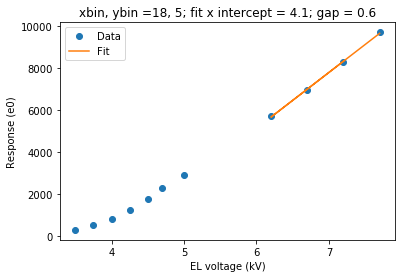

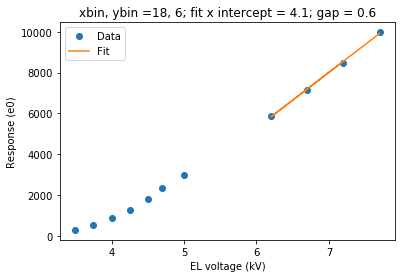

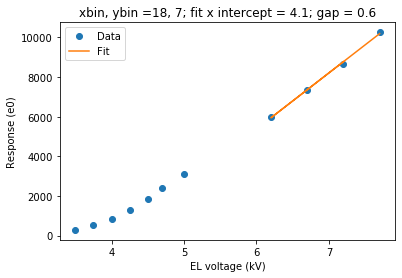

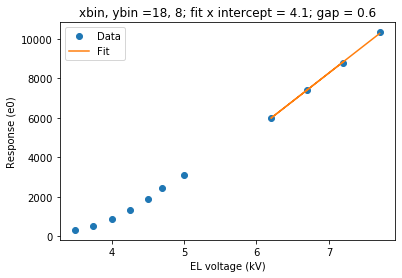

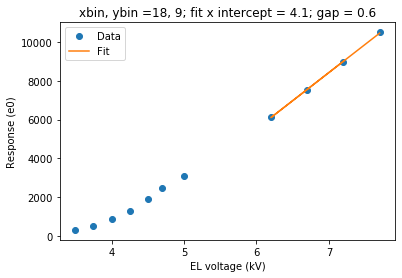

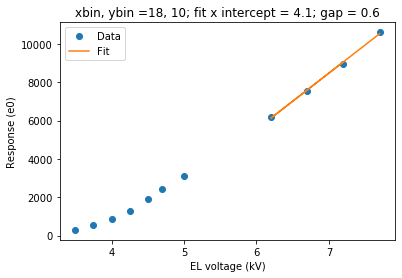

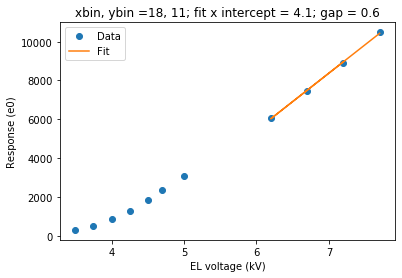

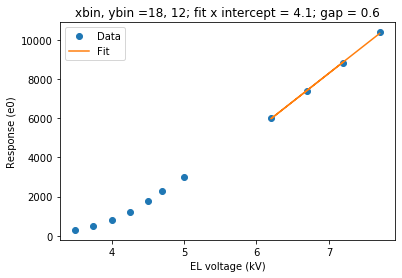

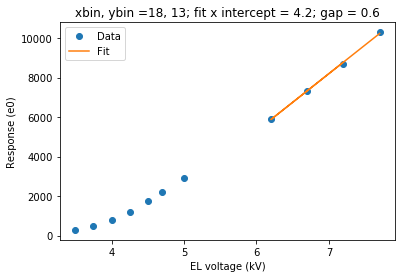

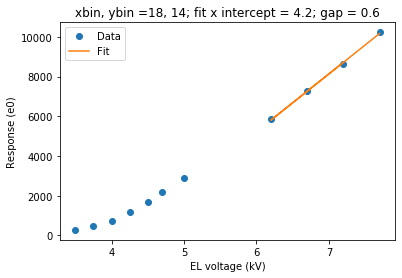

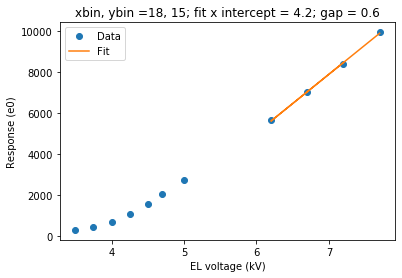

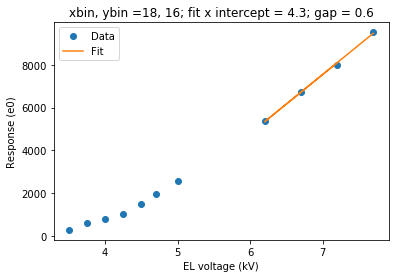

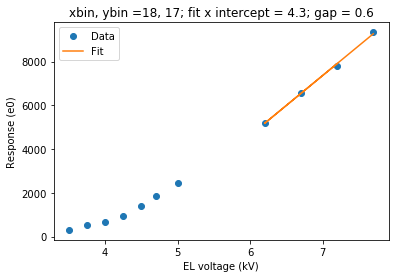

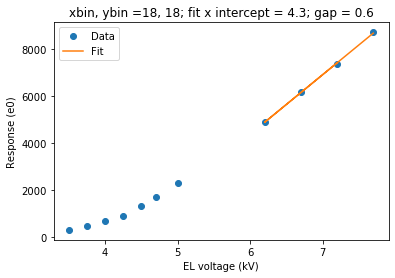

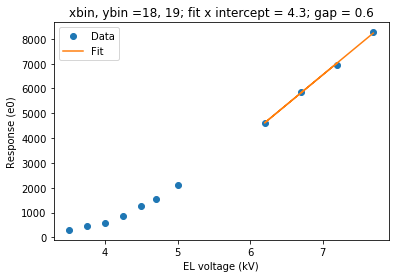

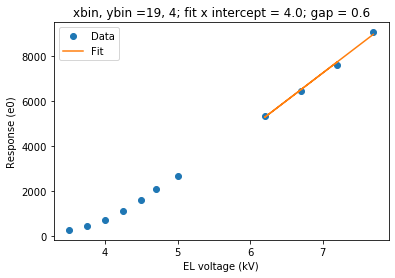

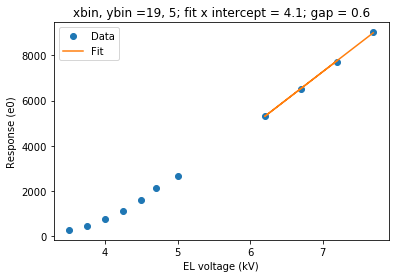

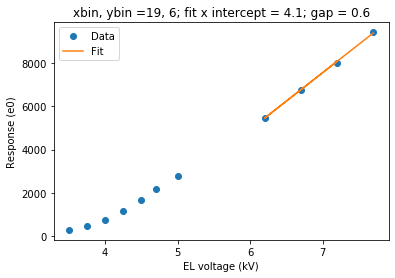

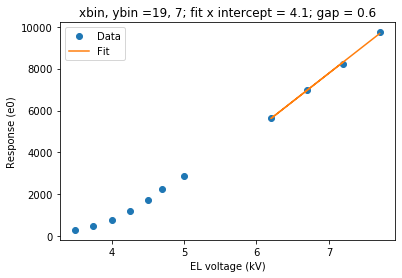

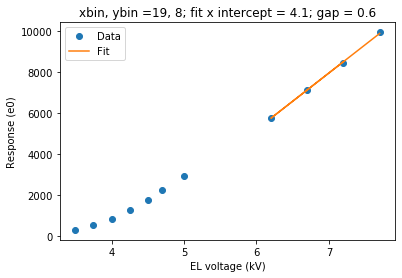

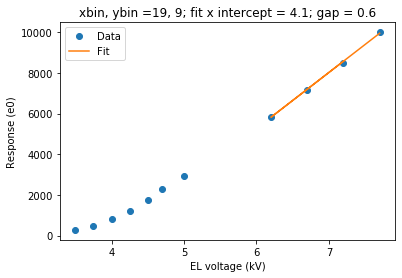

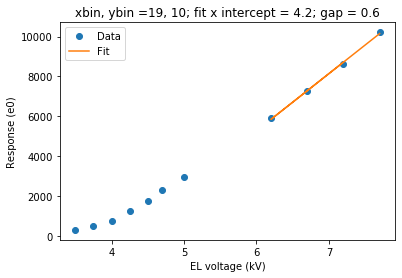

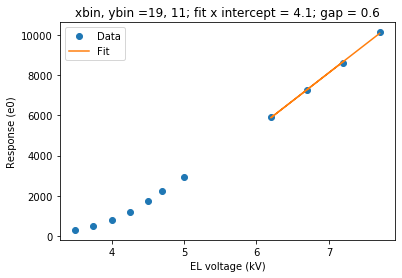

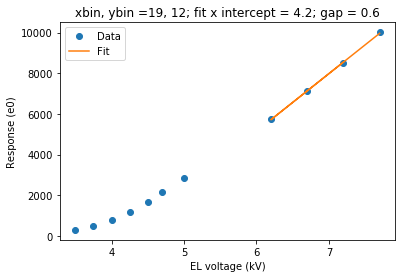

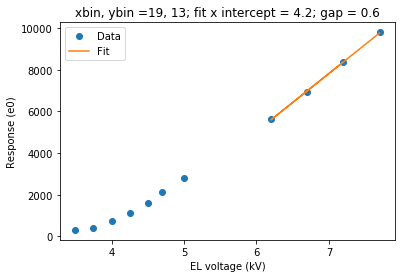

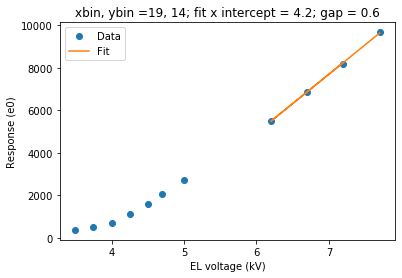

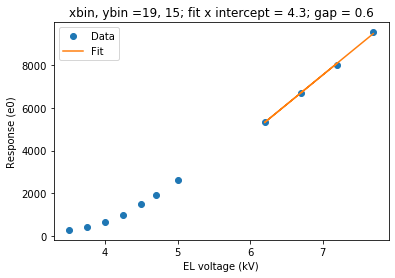

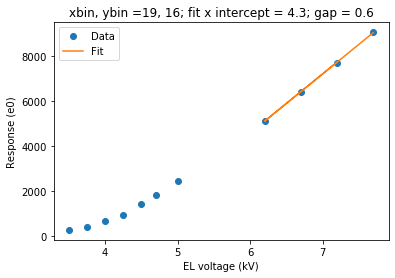

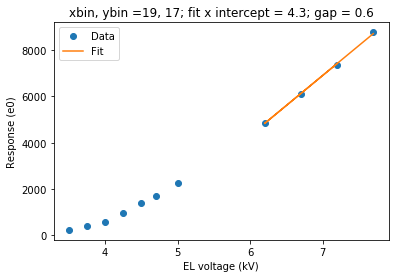

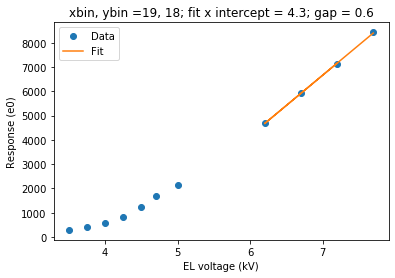

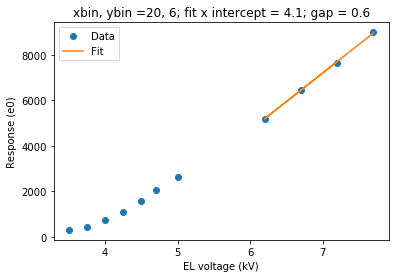

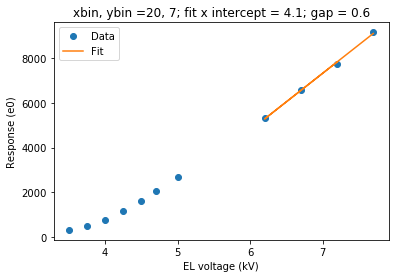

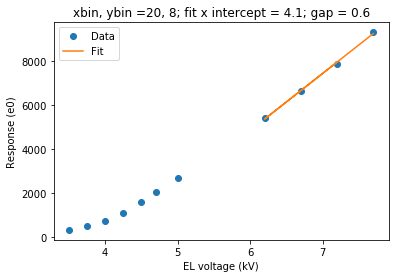

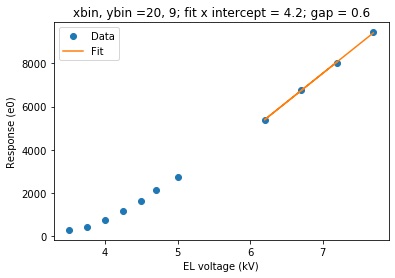

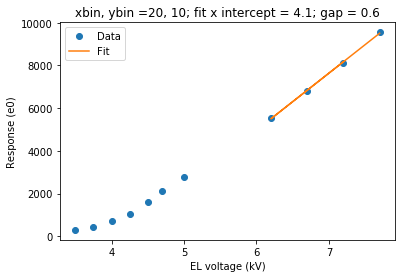

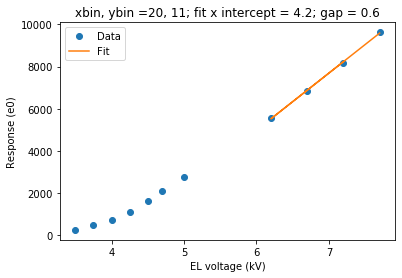

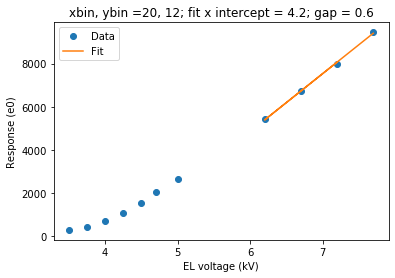

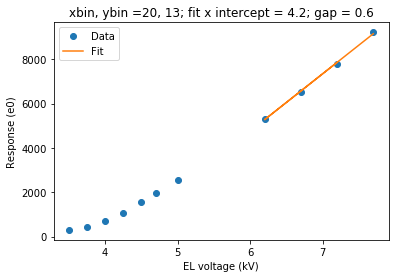

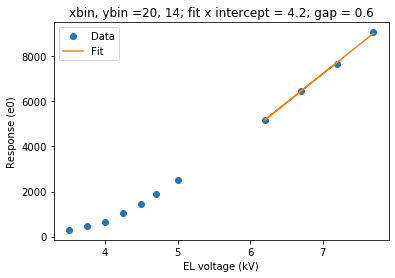

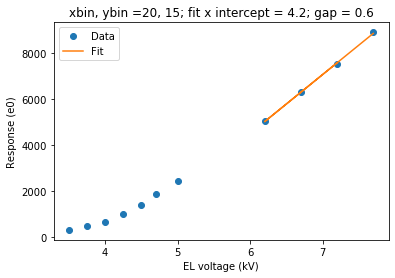

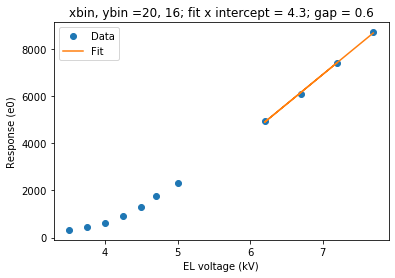

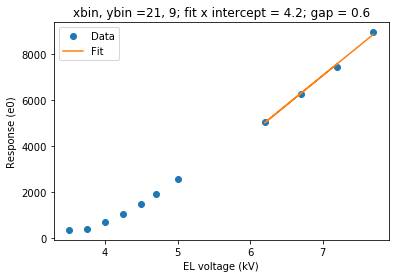

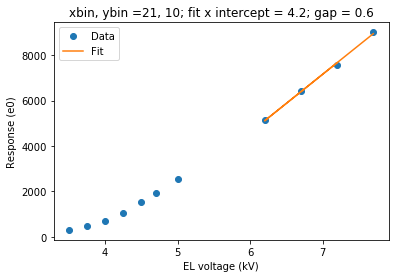

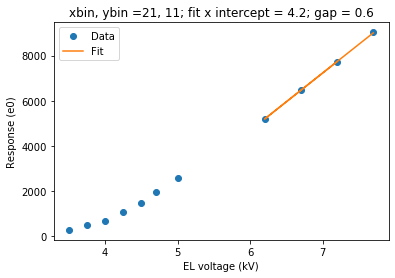

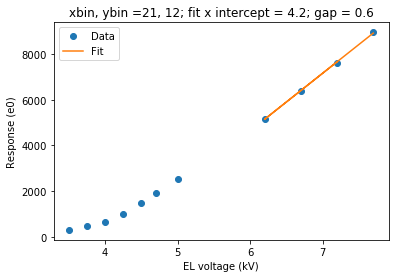

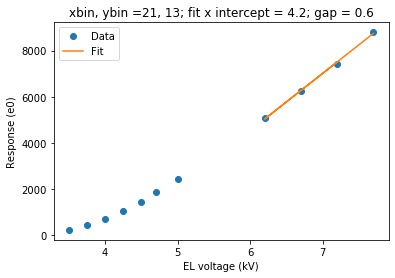

In [9]:
B = 0.7
p = 10

gaps = np.empty((len(energy_v_bin_by_run[0]), len(energy_v_bin_by_run[0][0])))
gaps[:] = np.nan
for xbin in range(len(energy_v_bin_by_run[0])):
    for ybin in range(len(energy_v_bin_by_run[0][0])):
        if not np.isnan(energy_v_bin_by_run[0][xbin][ybin]):
                    
            energy_v_run = np.array([ run_e[xbin][ybin] for run_e in energy_v_bin_by_run ])
            popt, pcov = curve_fit(line, ELVs[ELVs > 6], energy_v_run[ELVs > 6])
            fitline = line( ELVs[ELVs > 6], *popt)
            V0 = -popt[1]/popt[0]
            gap = V0 / (B * p)
            gaps[xbin][ybin] = gap
            
            plt.plot(ELVs, energy_v_run, 'o', label='Data')
            plt.plot(ELVs[ELVs > 6], fitline, label='Fit')
            plt.legend()
            plt.xlabel('EL voltage (kV)')
            plt.ylabel('Response (e0)')
            plt.title('xbin, ybin ='+str(xbin)+', '+str(ybin)+'; fit x intercept = '+str(round(V0,1))+'; gap = '+str(round(gap,2)))
            plt.show()

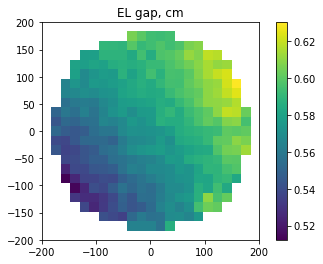

In [18]:
plt.imshow(gaps, extent=[-200, 200, -200, 200], origin = 'lower')
plt.title('EL gap, cm')
plt.colorbar()
plt.show()

In [11]:
def plane(P, a, b, c):
    x, y = P
    return a*x + b*y + c

In [12]:
edges = np.linspace(-200, 200, len(gaps) + 1)
xbins = (edges[:len(edges)-1] + edges[1:])/2
ybins = xbins

ydata = gaps.ravel()
valid = ~np.isnan(ydata)

xypoints = [[], []]
for xbin in xbins:
    for ybin in ybins:
        xypoints[0].append(xbin)
        xypoints[1].append(ybin)
xypoints = np.array(xypoints)
xypoints_all = np.copy(xypoints)
xypoints = np.array([xypoints[0][valid], xypoints[1][valid]])

In [13]:
from scipy.optimize import curve_fit

In [14]:
popt, pcov = curve_fit(plane, xypoints, ydata[valid])

In [15]:
gaps_fit = np.copy(gaps)
for xbin in range(len(gaps)):
    x = xbins[xbin]
    for ybin in range(len(gaps[0])):
        y = ybins[ybin]
        if not np.isnan(gaps_fit[xbin][ybin]):
            gaps_fit[xbin][ybin] = plane((x, y), *popt)

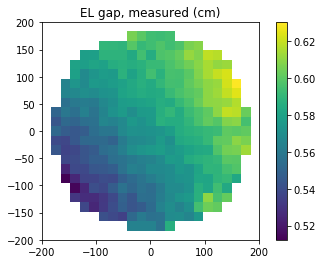

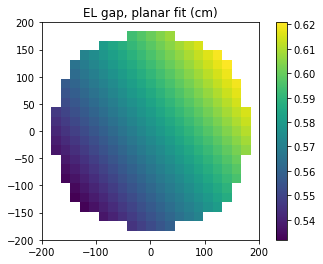

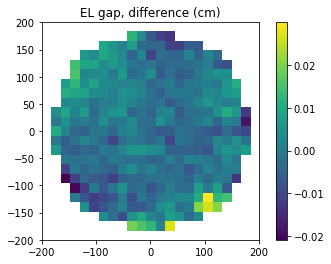

In [19]:
plt.imshow(gaps, extent=[-200, 200, -200, 200], origin = 'lower')
plt.title('EL gap, measured (cm)')
plt.colorbar()
plt.show()

plt.imshow(gaps_fit, extent=[-200, 200, -200, 200], origin = 'lower')
plt.title('EL gap, planar fit (cm)')
plt.colorbar()
plt.show()

plt.imshow(gaps - gaps_fit, extent=[-200, 200, -200, 200], origin = 'lower')
plt.title('EL gap, difference (cm)')
plt.colorbar()
plt.show()

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel/__main__.py:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


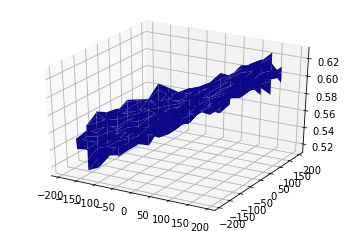

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xbins, ybins, gaps, cmap='plasma')
#cset = ax.contourf(X, Y, Z-fit, zdir='z', offset=-4, cmap='plasma')
#ax.set_zlim(-4,np.max(fit))
plt.show()
